In [296]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, impute, linear_model, tree, ensemble, inspection, naive_bayes, model_selection, pipeline, cluster, metrics

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [190]:
# Credit: https://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
SMALL_SIZE = 40
MEDIUM_SIZE = 50
BIGGER_SIZE = 60

plt.rc('font', size=SMALL_SIZE)          # controls default text siz
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure titl

## Small Dataset

In [191]:
# Import dataset
df = pd.read_csv("../dataset/dota2_matches_small.csv")
print(df.shape)
df.head()

(844, 214)


Anti-Mage  Axe  Bane  Bloodseeker  Crystal Maiden  Drow Ranger  \
0        0.0  0.0   2.0          0.0             0.0          0.0   
1        0.0  0.0   0.0          0.0             0.0          0.0   
2        0.0  0.0   0.0          0.0             0.0          0.0   
3        0.0  0.0   0.0          0.0             0.0          0.0   
4        0.0  0.0   1.0          0.0             0.0          0.0   

   Earthshaker  Juggernaut  Mirana  Morphling  ...  cluster_mode_league19  \
0          1.0         0.0     0.0        2.0  ...                    0.0   
1          0.0         0.0     0.0        0.0  ...                    0.0   
2          0.0         0.0     0.0        0.0  ...                    0.0   
3          0.0         0.0     0.0        0.0  ...                    0.0   
4          0.0         0.0     0.0        0.0  ...                    0.0   

   cluster_mode_league20  cluster_mode_league21  cluster_mode_league22  \
0                    0.0                    0.0                    1.0   
1                    0.0                    0.0                    0.0   
2                    0.0                    0.0                    0.0   
3                    0.0                    0.0                    0.0   
4                    0.0                    0.0                    0.0   

   cluster_mode_league23  cluster_mode_league24  cluster_mode_league25  \
0                    0.0                    0.0                    1.0   
1                    1.0                    0.0                    1.0   
2                    0.0                    0.0                    1.0   
3                    0.0                    0.0                    1.0   
4                    0.0                    1.0                    1.0   

   cluster_mode_league26  cluster_mode_league27  radiant_win  
0                    0.0                    1.0            1  
1                    0.0                    1.0            1  
2                    0.0                    1.0            1  
3                    0.0                    1.0            1  
4                    0.0                    1.0            1  

[5 rows x 214 columns]

In [192]:
# Create train and test sets
X = df.drop("radiant_win", axis=1)
y = df["radiant_win"]

# Scale and normalize data, as many ML models perform better
scaler = preprocessing.StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Determine importance of features

https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [193]:
imp_df_small = pd.DataFrame()

#### Logistic Regression

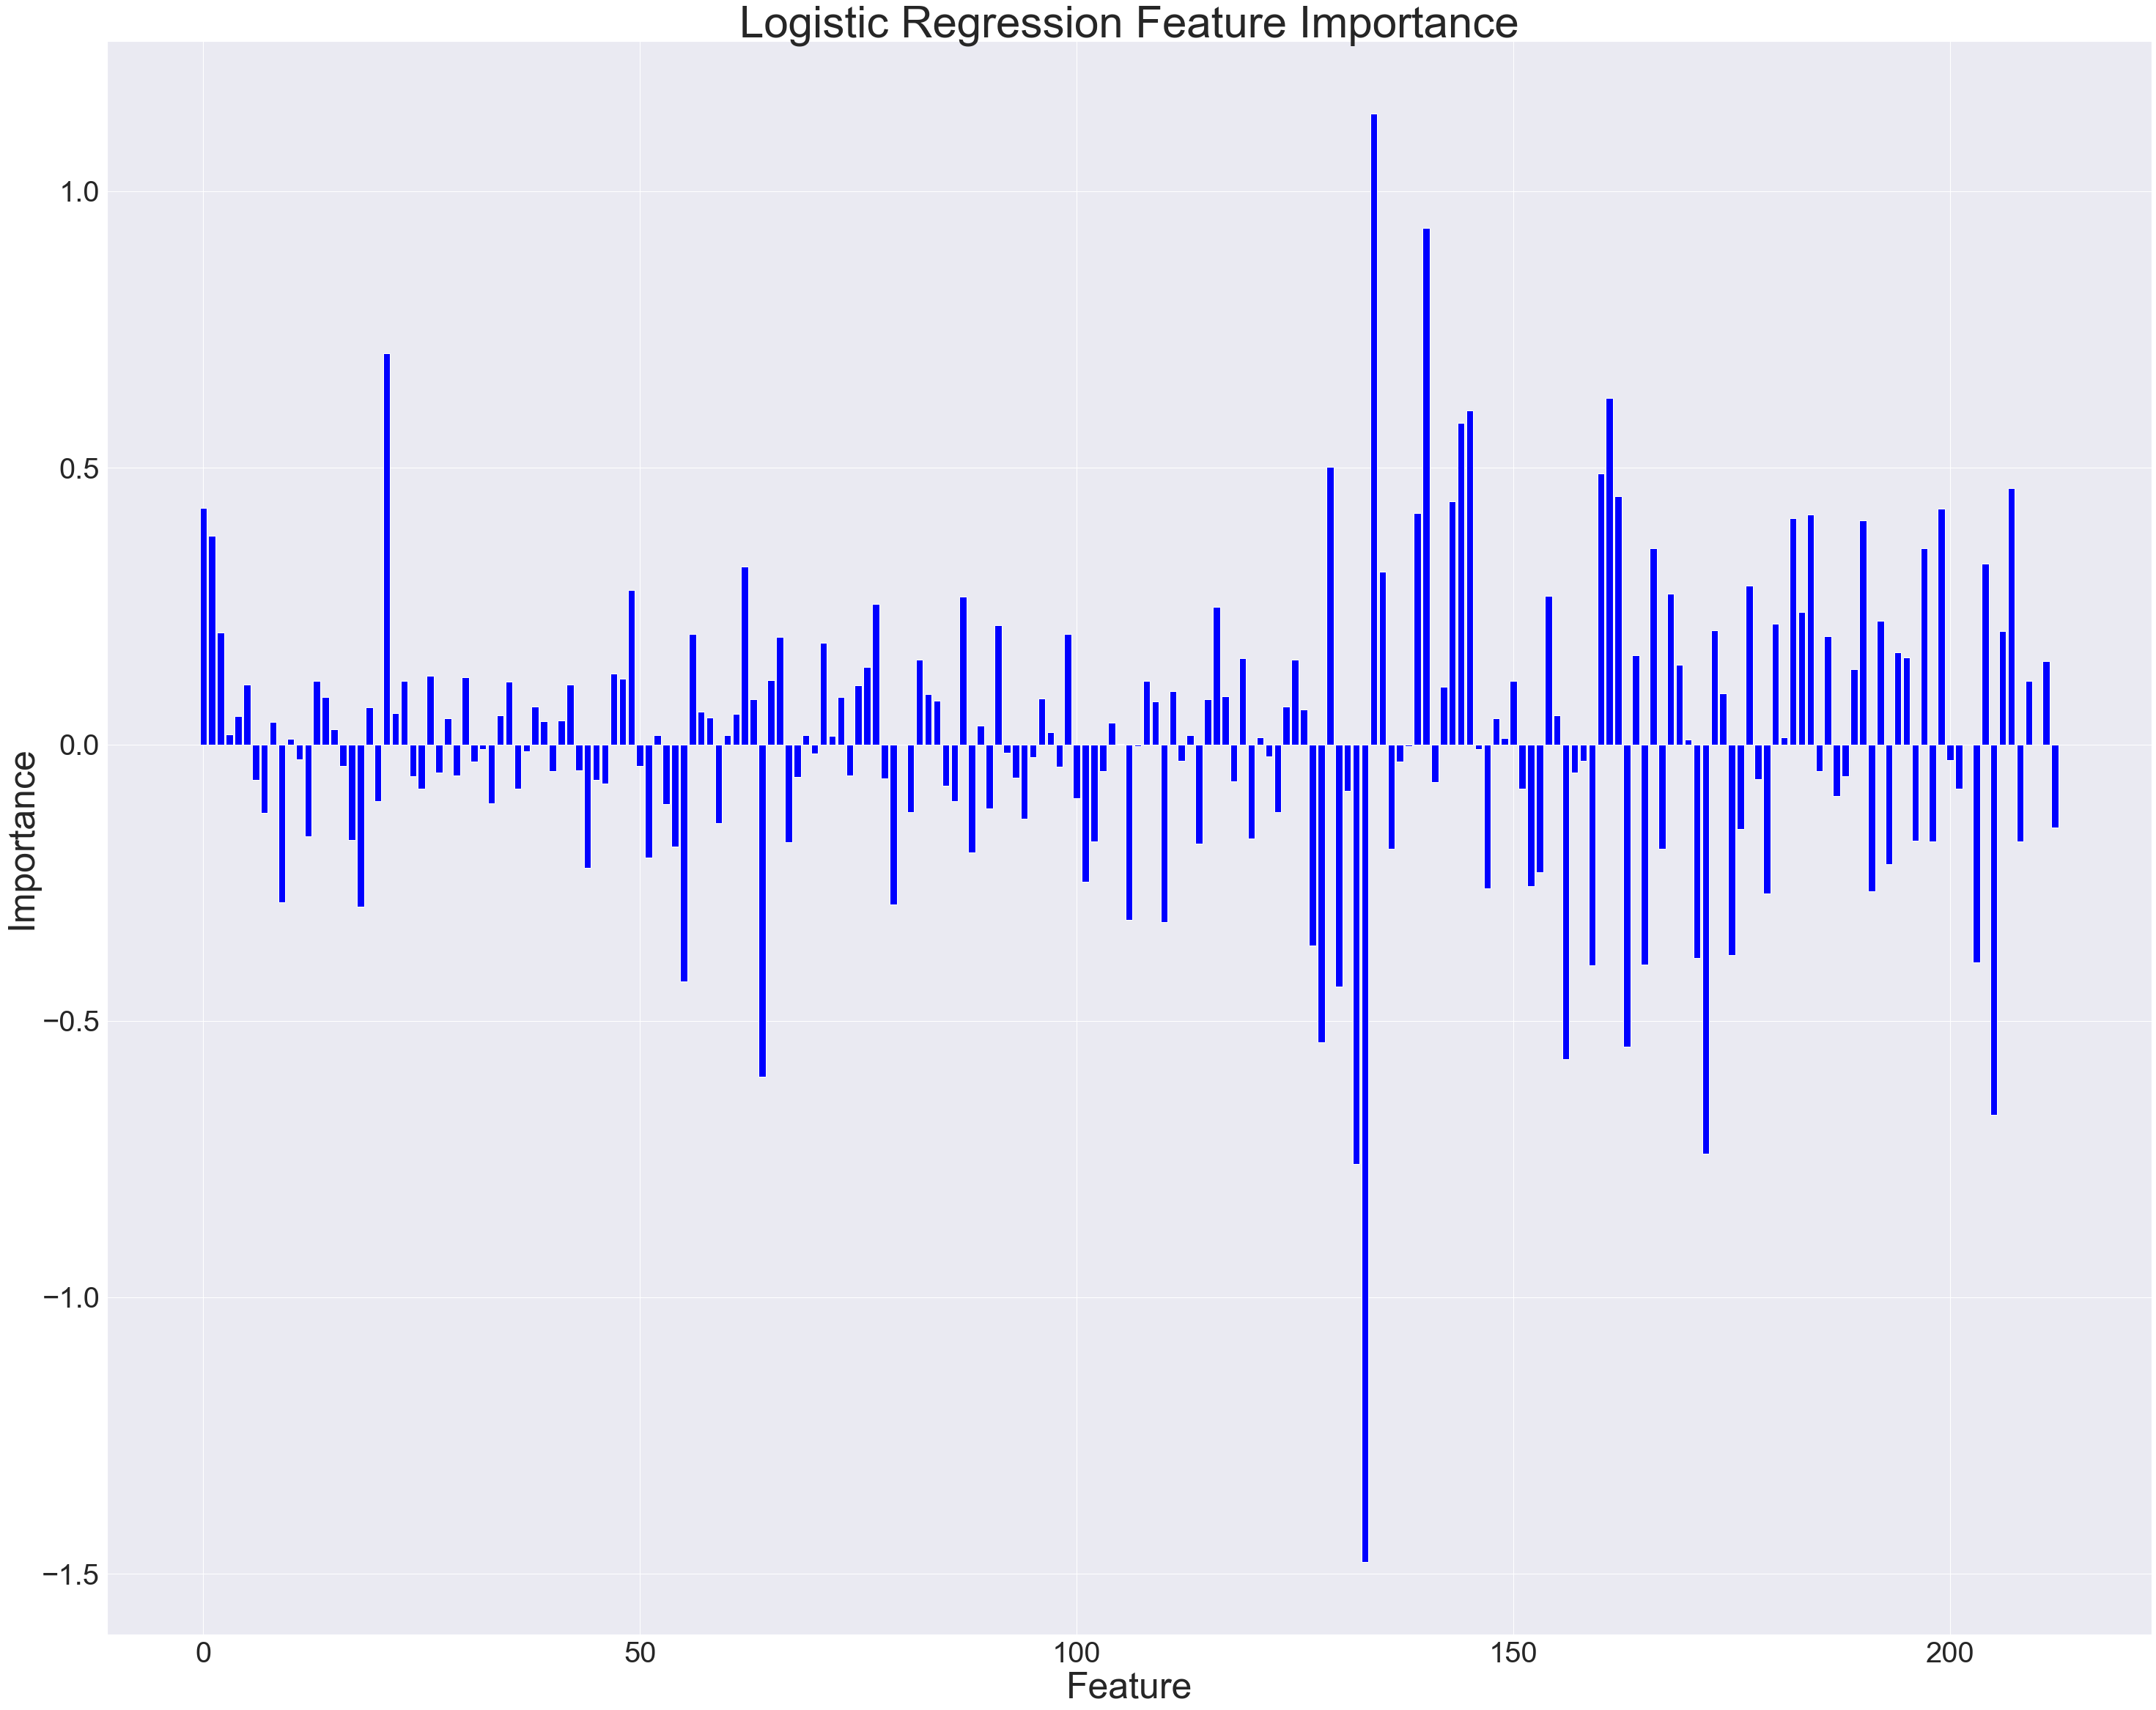

In [194]:
# #Scale the data 
# scaler = preprocessing.StandardScaler()
# X_scaled = scaler.fit_transform(X)

#Build and train logistic regression model 
lrm = linear_model.LogisticRegression(max_iter=1000)
lrm.fit(X, y)
importance = dict()
for i,v in enumerate(lrm.coef_[0]):
    importance[i] = v
    
imp_df_small = imp_df_small.append(importance, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(lrm.coef_[0]))], importance.values(), color='blue')
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Lasso Regression

https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

In [117]:
#Create pipeline for grid search
pipe = pipeline.Pipeline([
                     ('scaler',preprocessing.StandardScaler()),
                     ('model',linear_model.Lasso())
])

#Grid search for model with the most optimum hyperparameter
search = model_selection.GridSearchCV(pipe, {'model__alpha':np.arange(0.1,10,0.1)}, cv = 5, scoring="neg_mean_squared_error")
search.fit(X, y)

# Retrieve feature importances from the optimized model
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

In [118]:
importance

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.])

#### Decision Tree

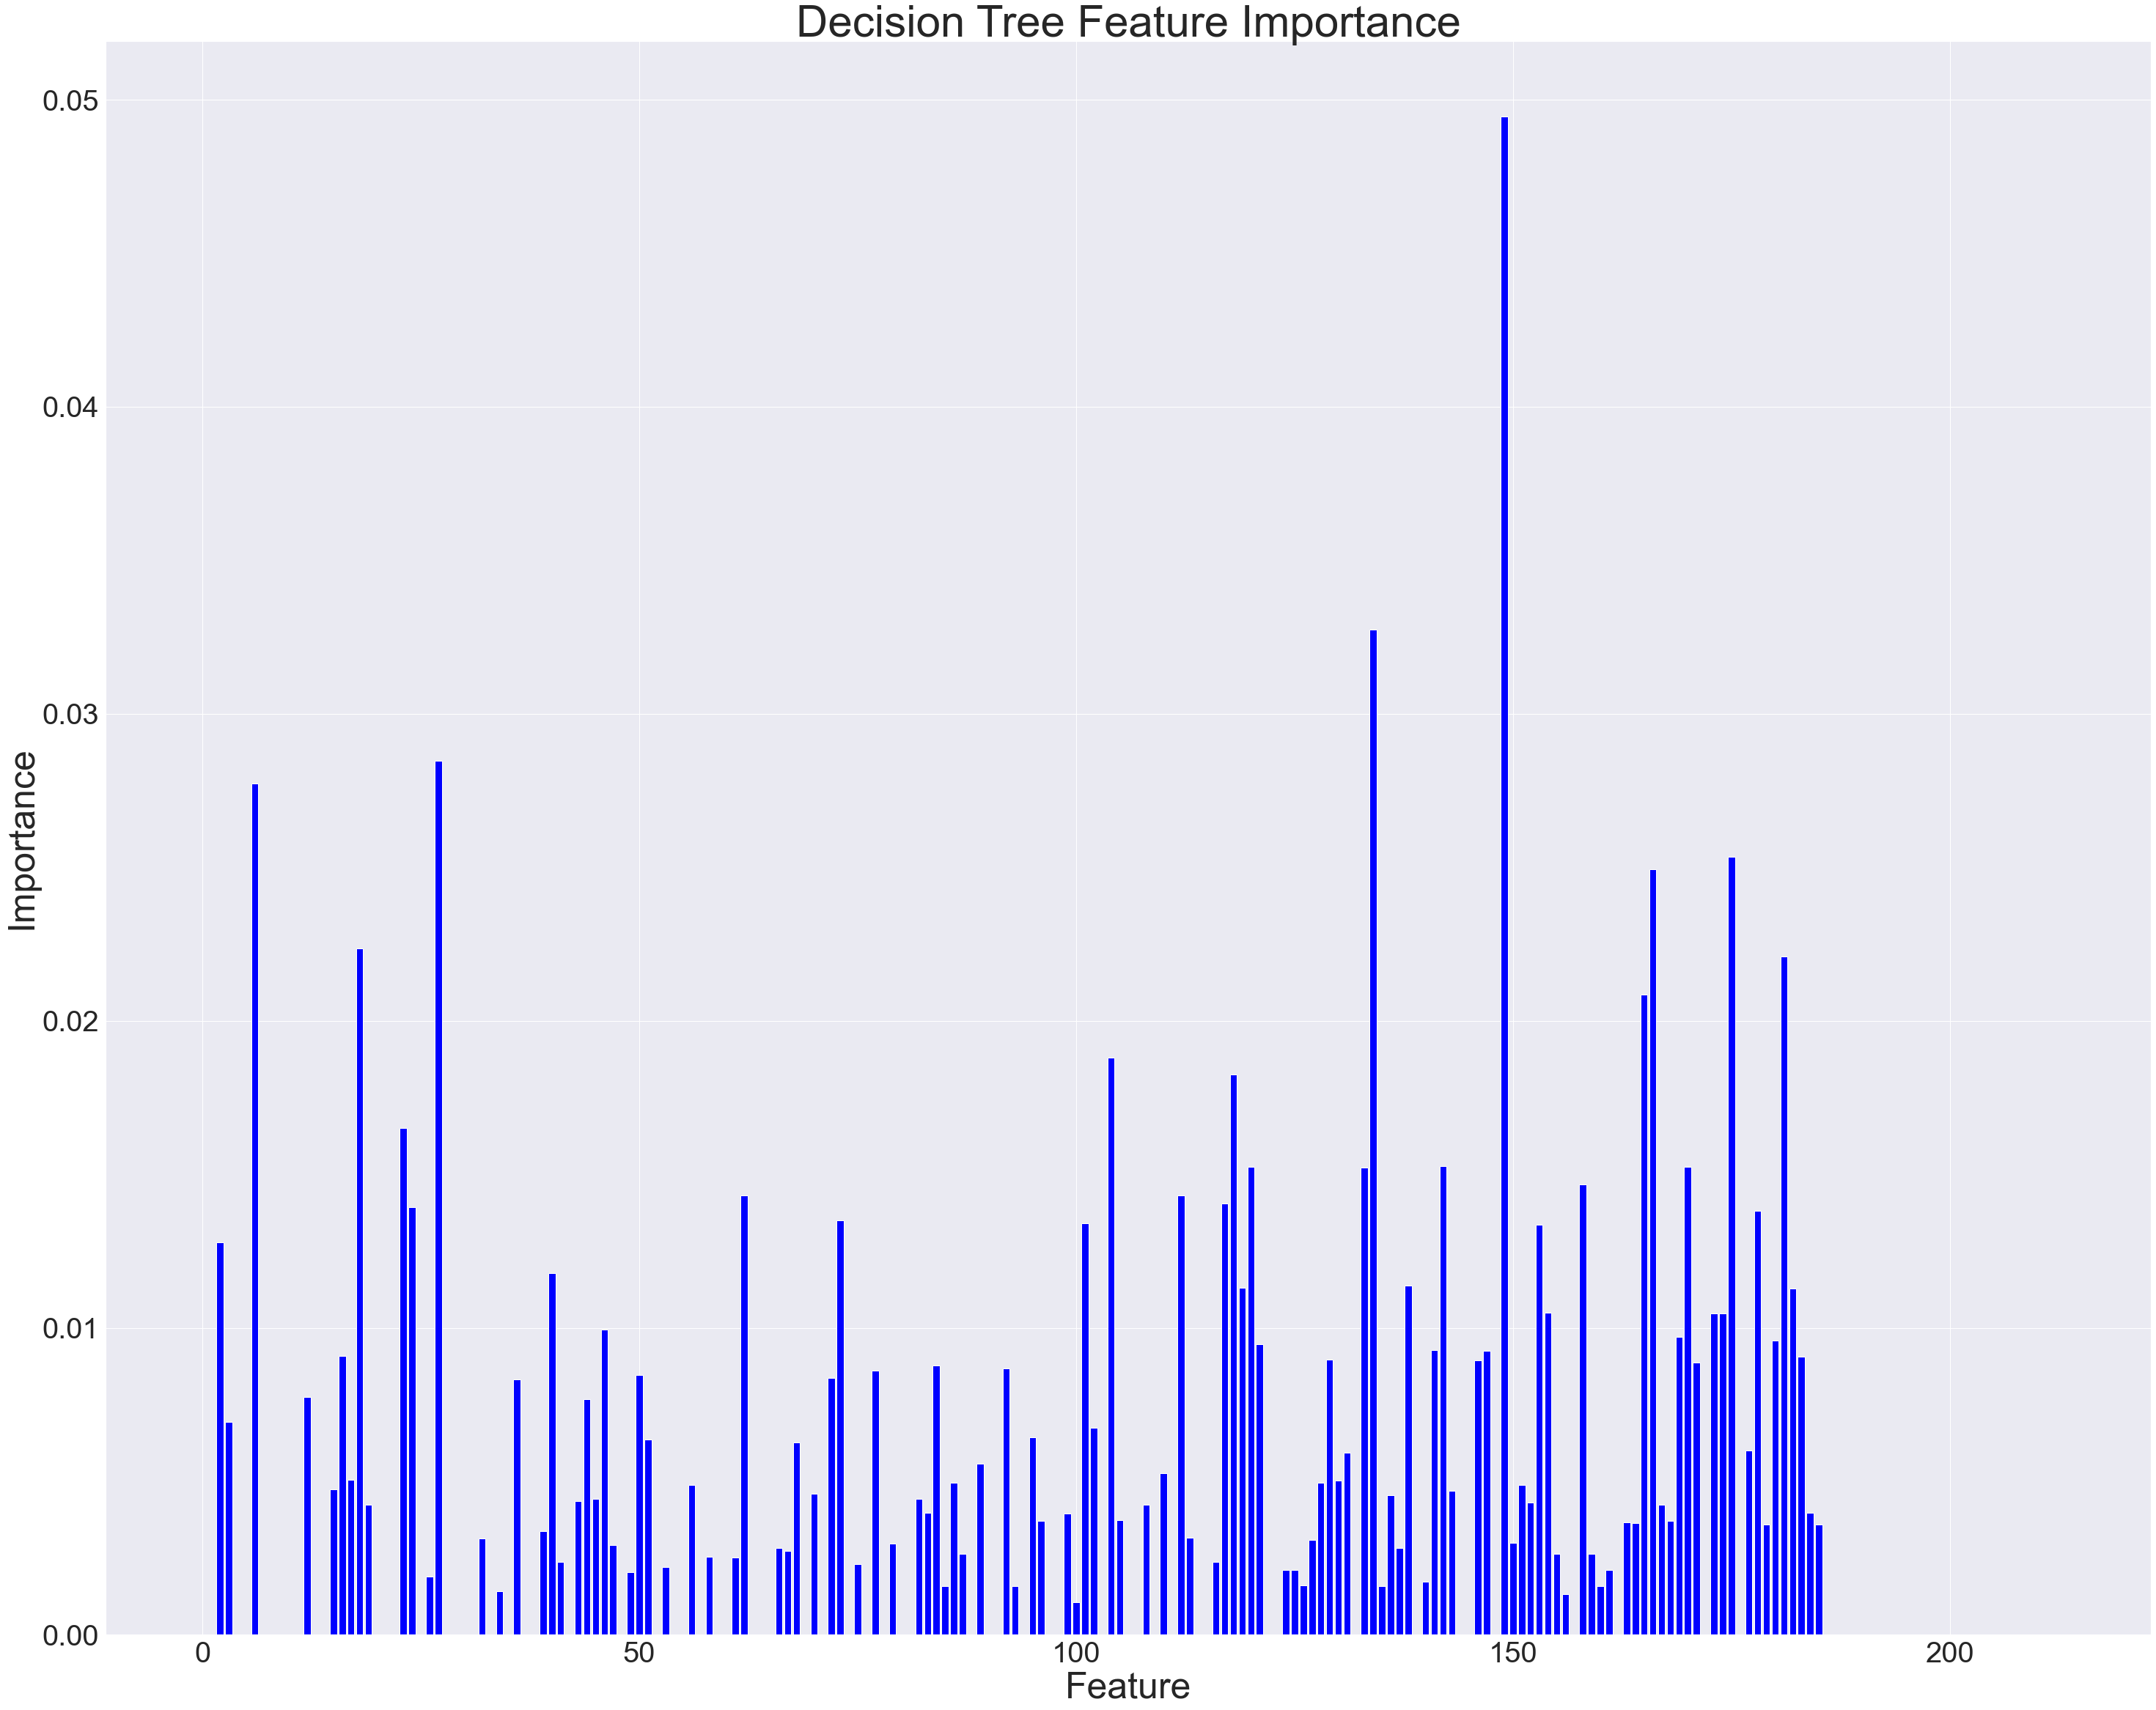

In [195]:
# create and fit the model+
dtc = tree.DecisionTreeClassifier()
dtc.fit(X, y)

# Separate and store the feature weights as specified by the model
importance = dict()
for i,v in enumerate(dtc.feature_importances_):
    importance[i] = v
    
imp_df_small = imp_df_small.append(importance, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(dtc.feature_importances_))], dtc.feature_importances_, color='blue')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Random Forest

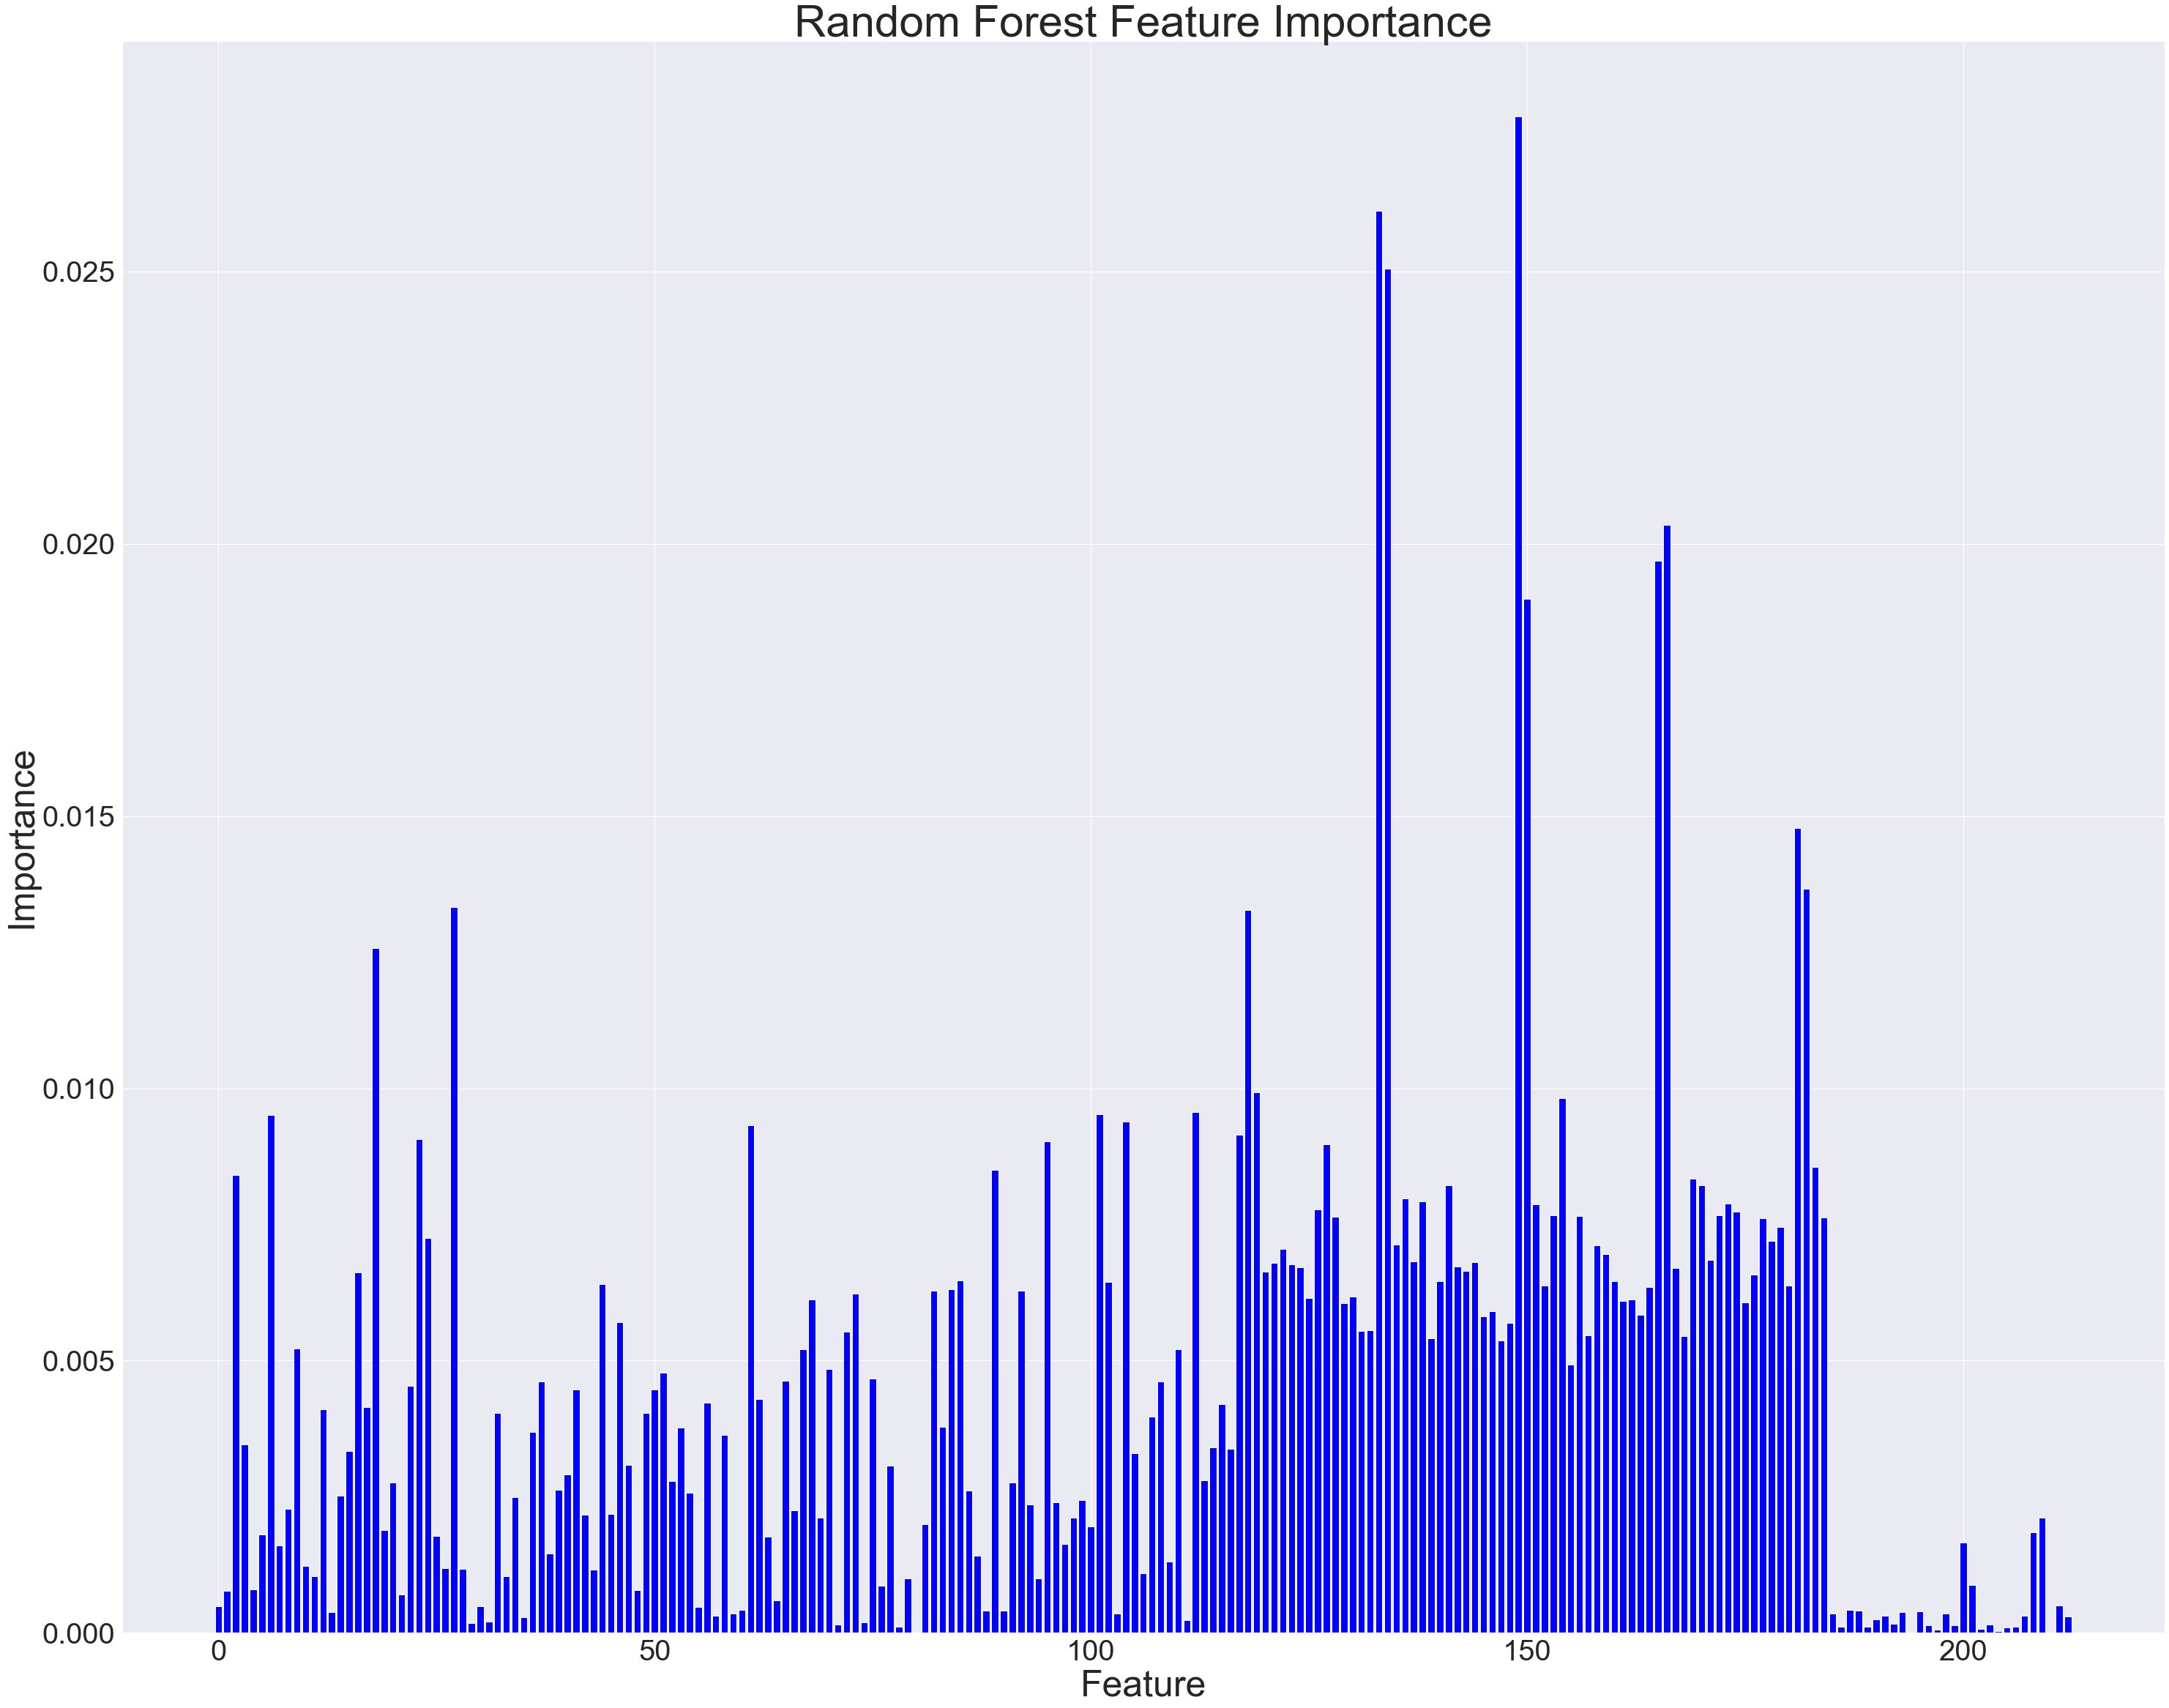

In [196]:
rfm = ensemble.RandomForestClassifier()
rfm.fit(X, y)

importance = dict()
for i,v in enumerate(rfm.feature_importances_):
    importance[i] = v
    
imp_df_small = imp_df_small.append(importance, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(rfm.feature_importances_))], rfm.feature_importances_, color='blue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Naive Bayes with Permutation importance

https://inblog.in/Feature-Importance-in-Naive-Bayes-Classifiers-5qob5d5sFW

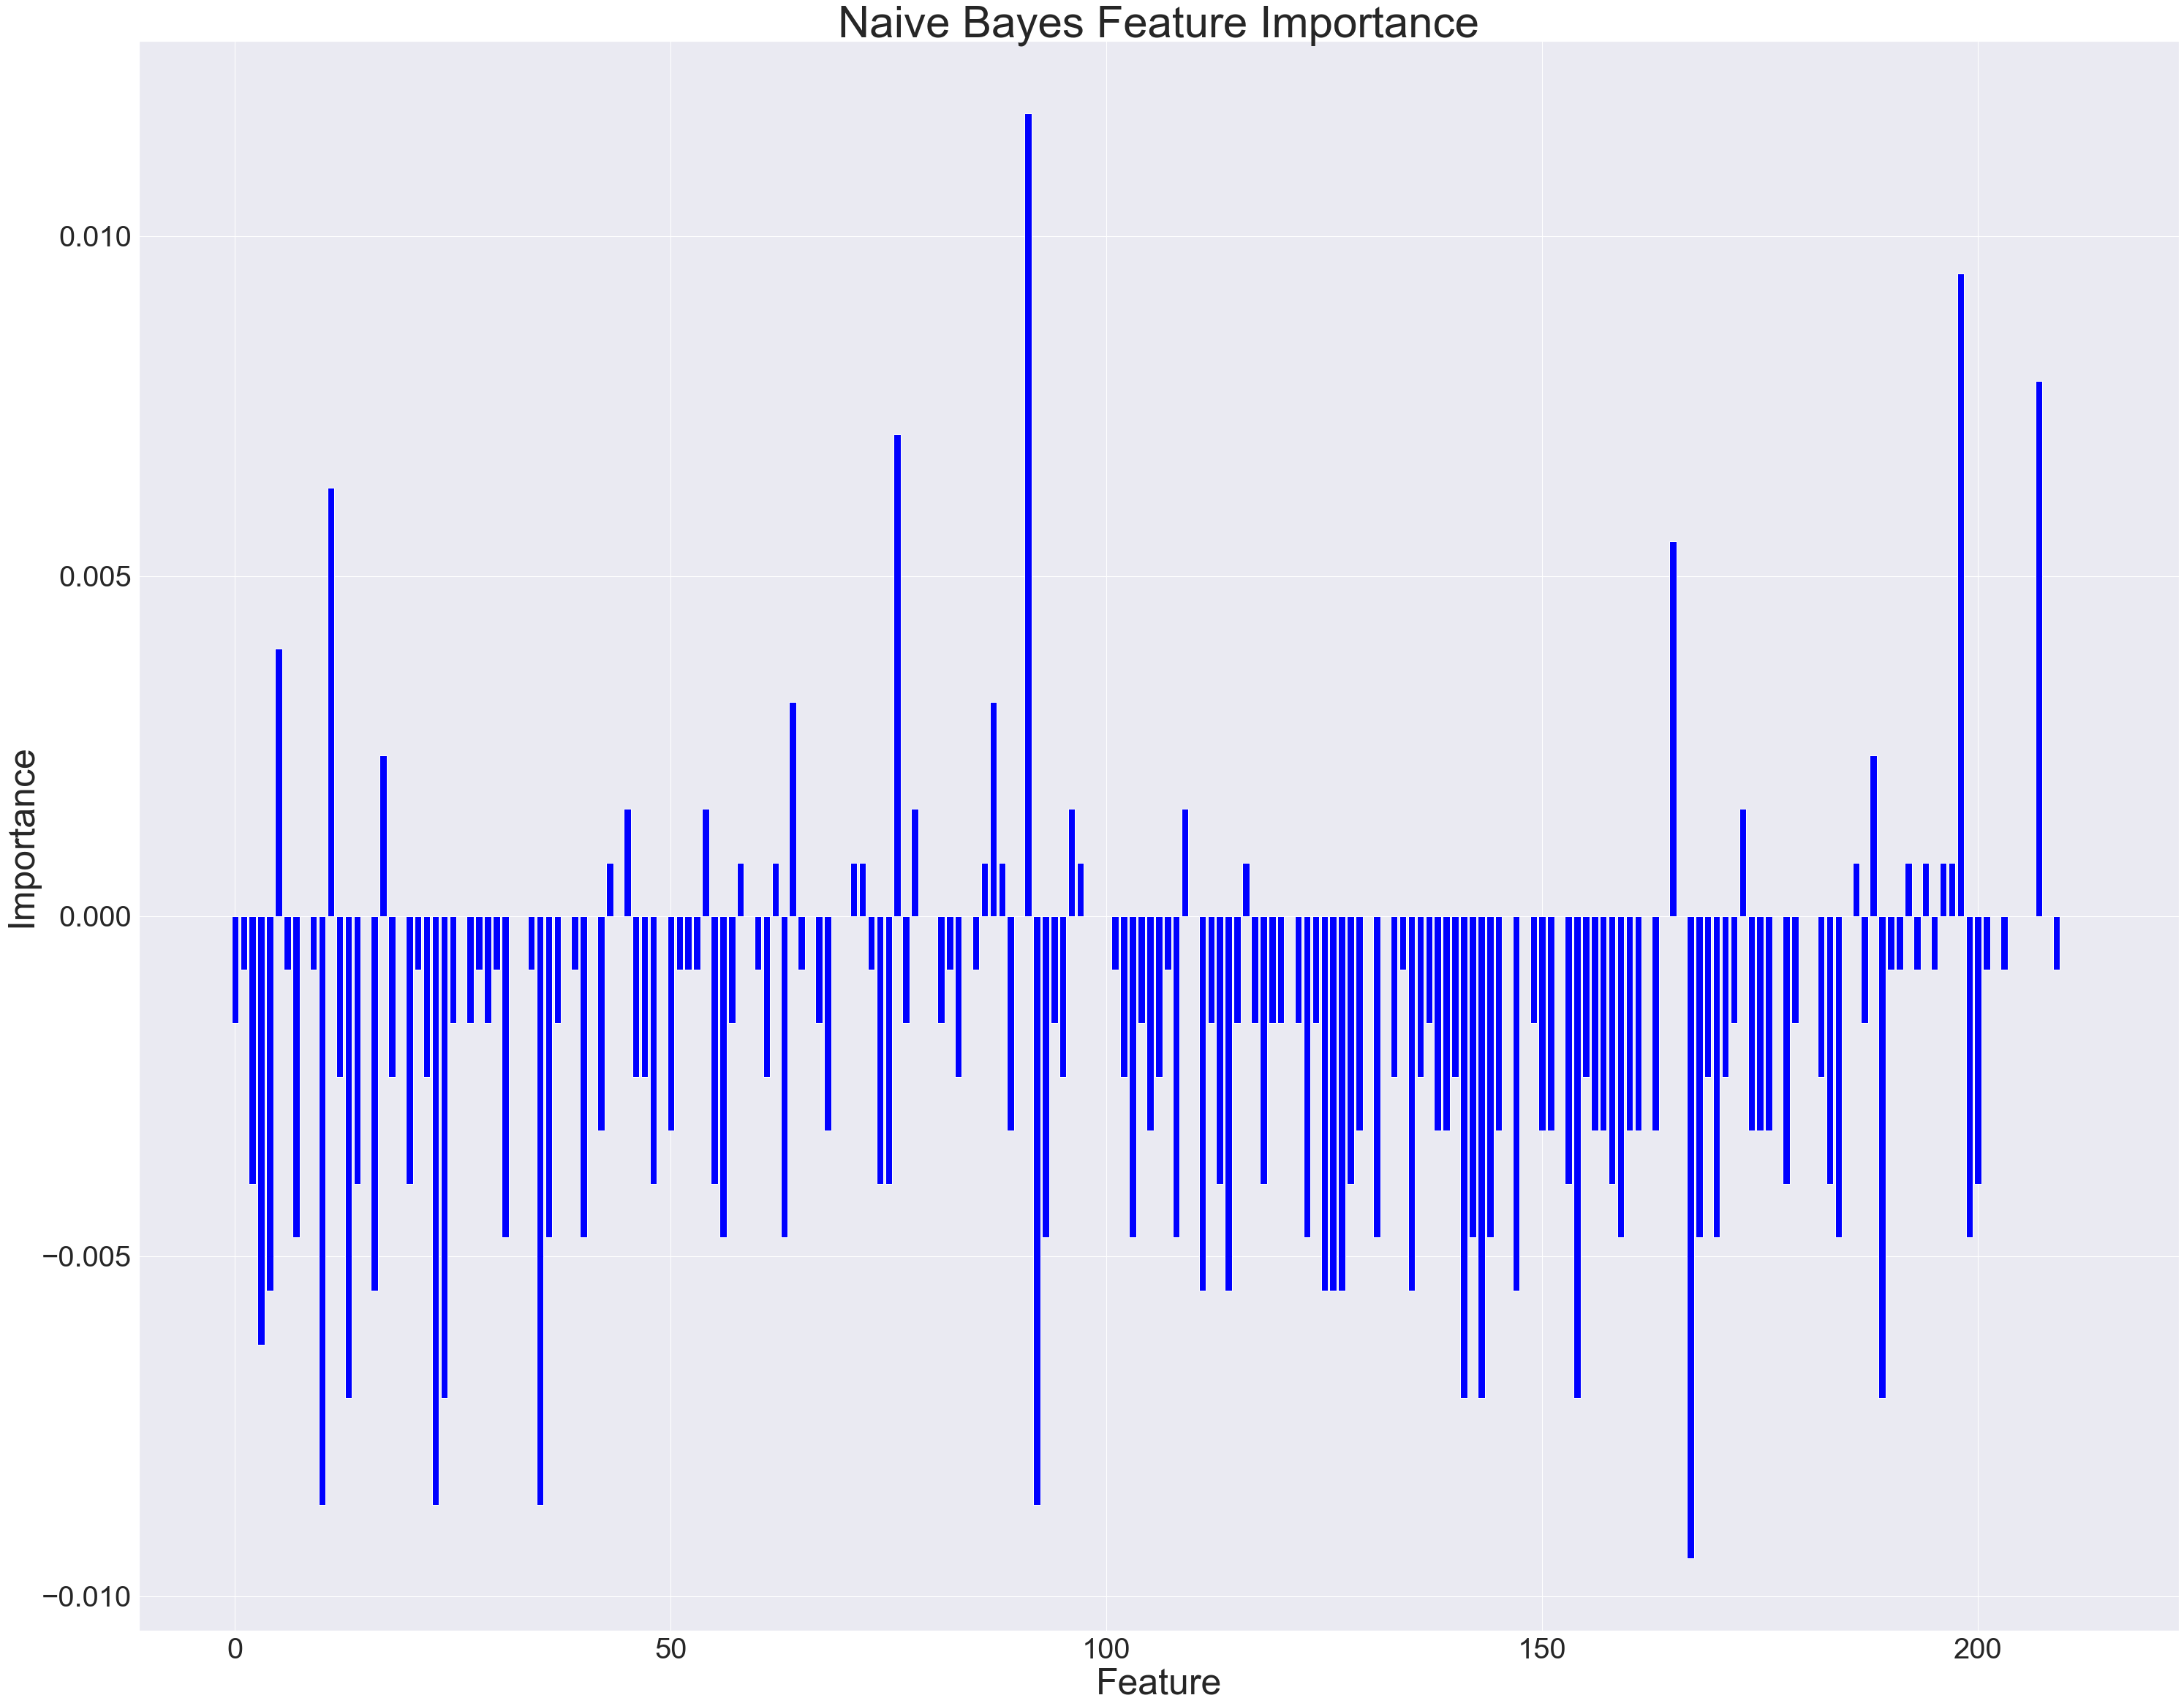

In [197]:
#Create model, train, test splits
gnb = naive_bayes.GaussianNB()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=173)
gnb.fit(X_train, y_train)

# Calculate importances by testing with the trained model
imps = inspection.permutation_importance(gnb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std

#store the feature importances
gnb_imp = dict()
for i,j in enumerate(importances):
    gnb_imp[i] = j
imp_df_small = imp_df_small.append(gnb_imp, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(imps.importances_mean))], imps.importances_mean, color='blue')
plt.title("Naive Bayes Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Label columns and index

In [198]:
imp_df_small['model'] = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
imp_df_small.set_index('model', inplace=True)
imp_df_small.columns = X.columns
imp_df_small.shape

(4, 213)

## Large Dataset

In [199]:
# Import dataset
df = pd.read_csv("../dataset/dota2_matches_large.csv")
df.drop(columns='lobby_type', inplace=True)
print(df.shape)
df.head()

(206038, 325)


radiant_win  dire_rating  dire_wins  dire_losses  radiant_rating  \
0         True     1013.840        102          130        1033.330   
1        False      910.743        167          201         890.034   
2         True     1051.340        138          165        1274.190   
3        False     1013.840        102          130        1033.330   
4         True      890.034        159          257         910.743   

   radiant_wins  radiant_losses  dire_Anti-Mage  dire_Axe  dire_Bane  ...  \
0           188             248               0         0          0  ...   
1           159             257               0         0          0  ...   
2           154              80               0         0          0  ...   
3           188             248               0         0          0  ...   
4           167             201               0         0          0  ...   

   cluster_64  cluster_65  cluster_66  cluster_67  game_mode_0  game_mode_1  \
0         1.0         0.0         0.0         0.0          0.0          0.0   
1         0.0         1.0         0.0         0.0          0.0          0.0   
2         0.0         0.0         0.0         0.0          0.0          0.0   
3         1.0         0.0         0.0         0.0          0.0          0.0   
4         0.0         1.0         0.0         0.0          0.0          0.0   

   game_mode_2  tier_0  tier_1  tier_2  
0          1.0     0.0     0.0     1.0  
1          1.0     0.0     0.0     1.0  
2          1.0     0.0     0.0     1.0  
3          1.0     0.0     0.0     1.0  
4          1.0     0.0     0.0     1.0  

[5 rows x 325 columns]

In [200]:
# Create train and test sets
X = df.drop("radiant_win", axis=1)
y = df["radiant_win"]

#Scale the items since many models perform better with scaling
scaler = preprocessing.StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

### Determine importance of features

https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [201]:
imp_df_large = pd.DataFrame()

#### Logistic Regression

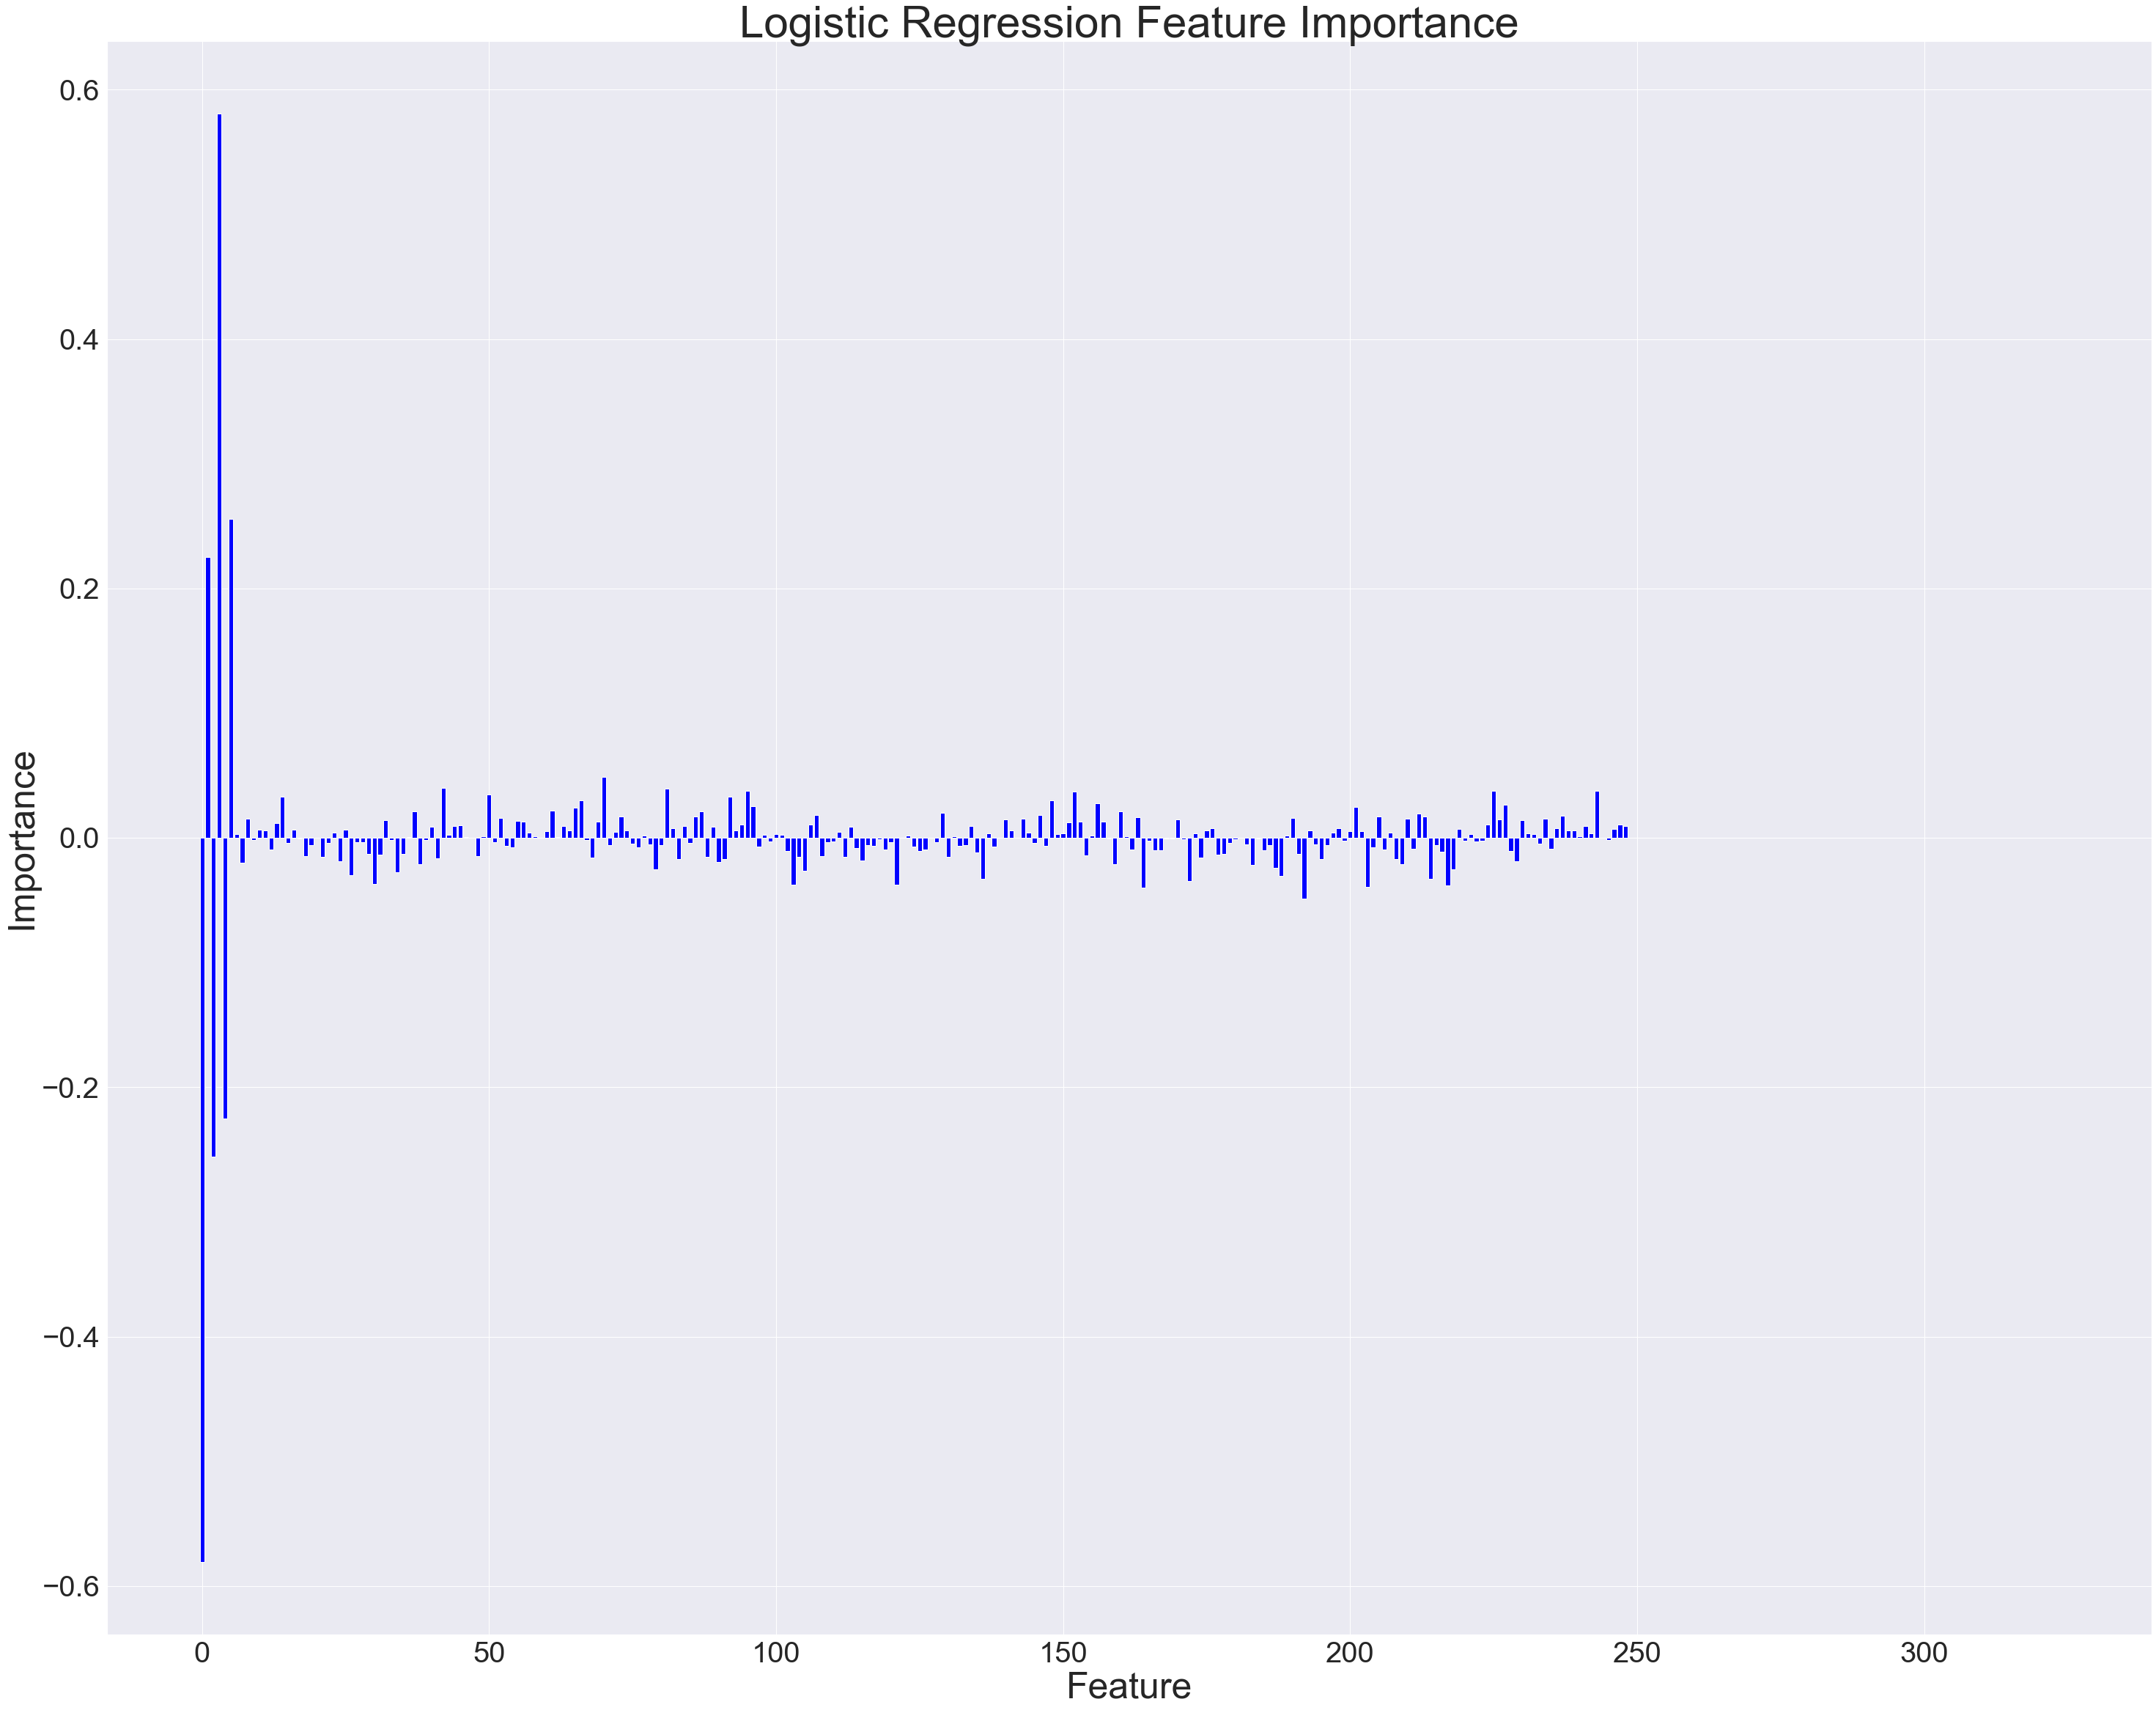

In [202]:
#Build and train logistic regression model 
lrm = linear_model.LogisticRegression(max_iter=1000)
lrm.fit(X, y)
importance = dict()
for i,v in enumerate(lrm.coef_[0]):
    importance[i] = v
    
imp_df_large = imp_df_large.append(importance, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(lrm.coef_[0]))], importance.values(), color='blue')
plt.title("Logistic Regression Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Lasso Regression

https://towardsdatascience.com/feature-selection-in-machine-learning-using-lasso-regression-7809c7c2771a

In [ ]:
#Create pipeline for grid search
pipe = pipeline.Pipeline([
                     ('scaler',preprocessing.StandardScaler()),
                     ('model',linear_model.Lasso())
])

#Grid search for model with the most optimum hyperparameter
search = model_selection.GridSearchCV(pipe, {'model__alpha':np.arange(0.1,10,0.1)}, cv = 5, scoring="neg_mean_squared_error")
search.fit(X, y)

# Retrieve feature importances from the optimized model
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)

In [ ]:
importance

#### Decision Tree

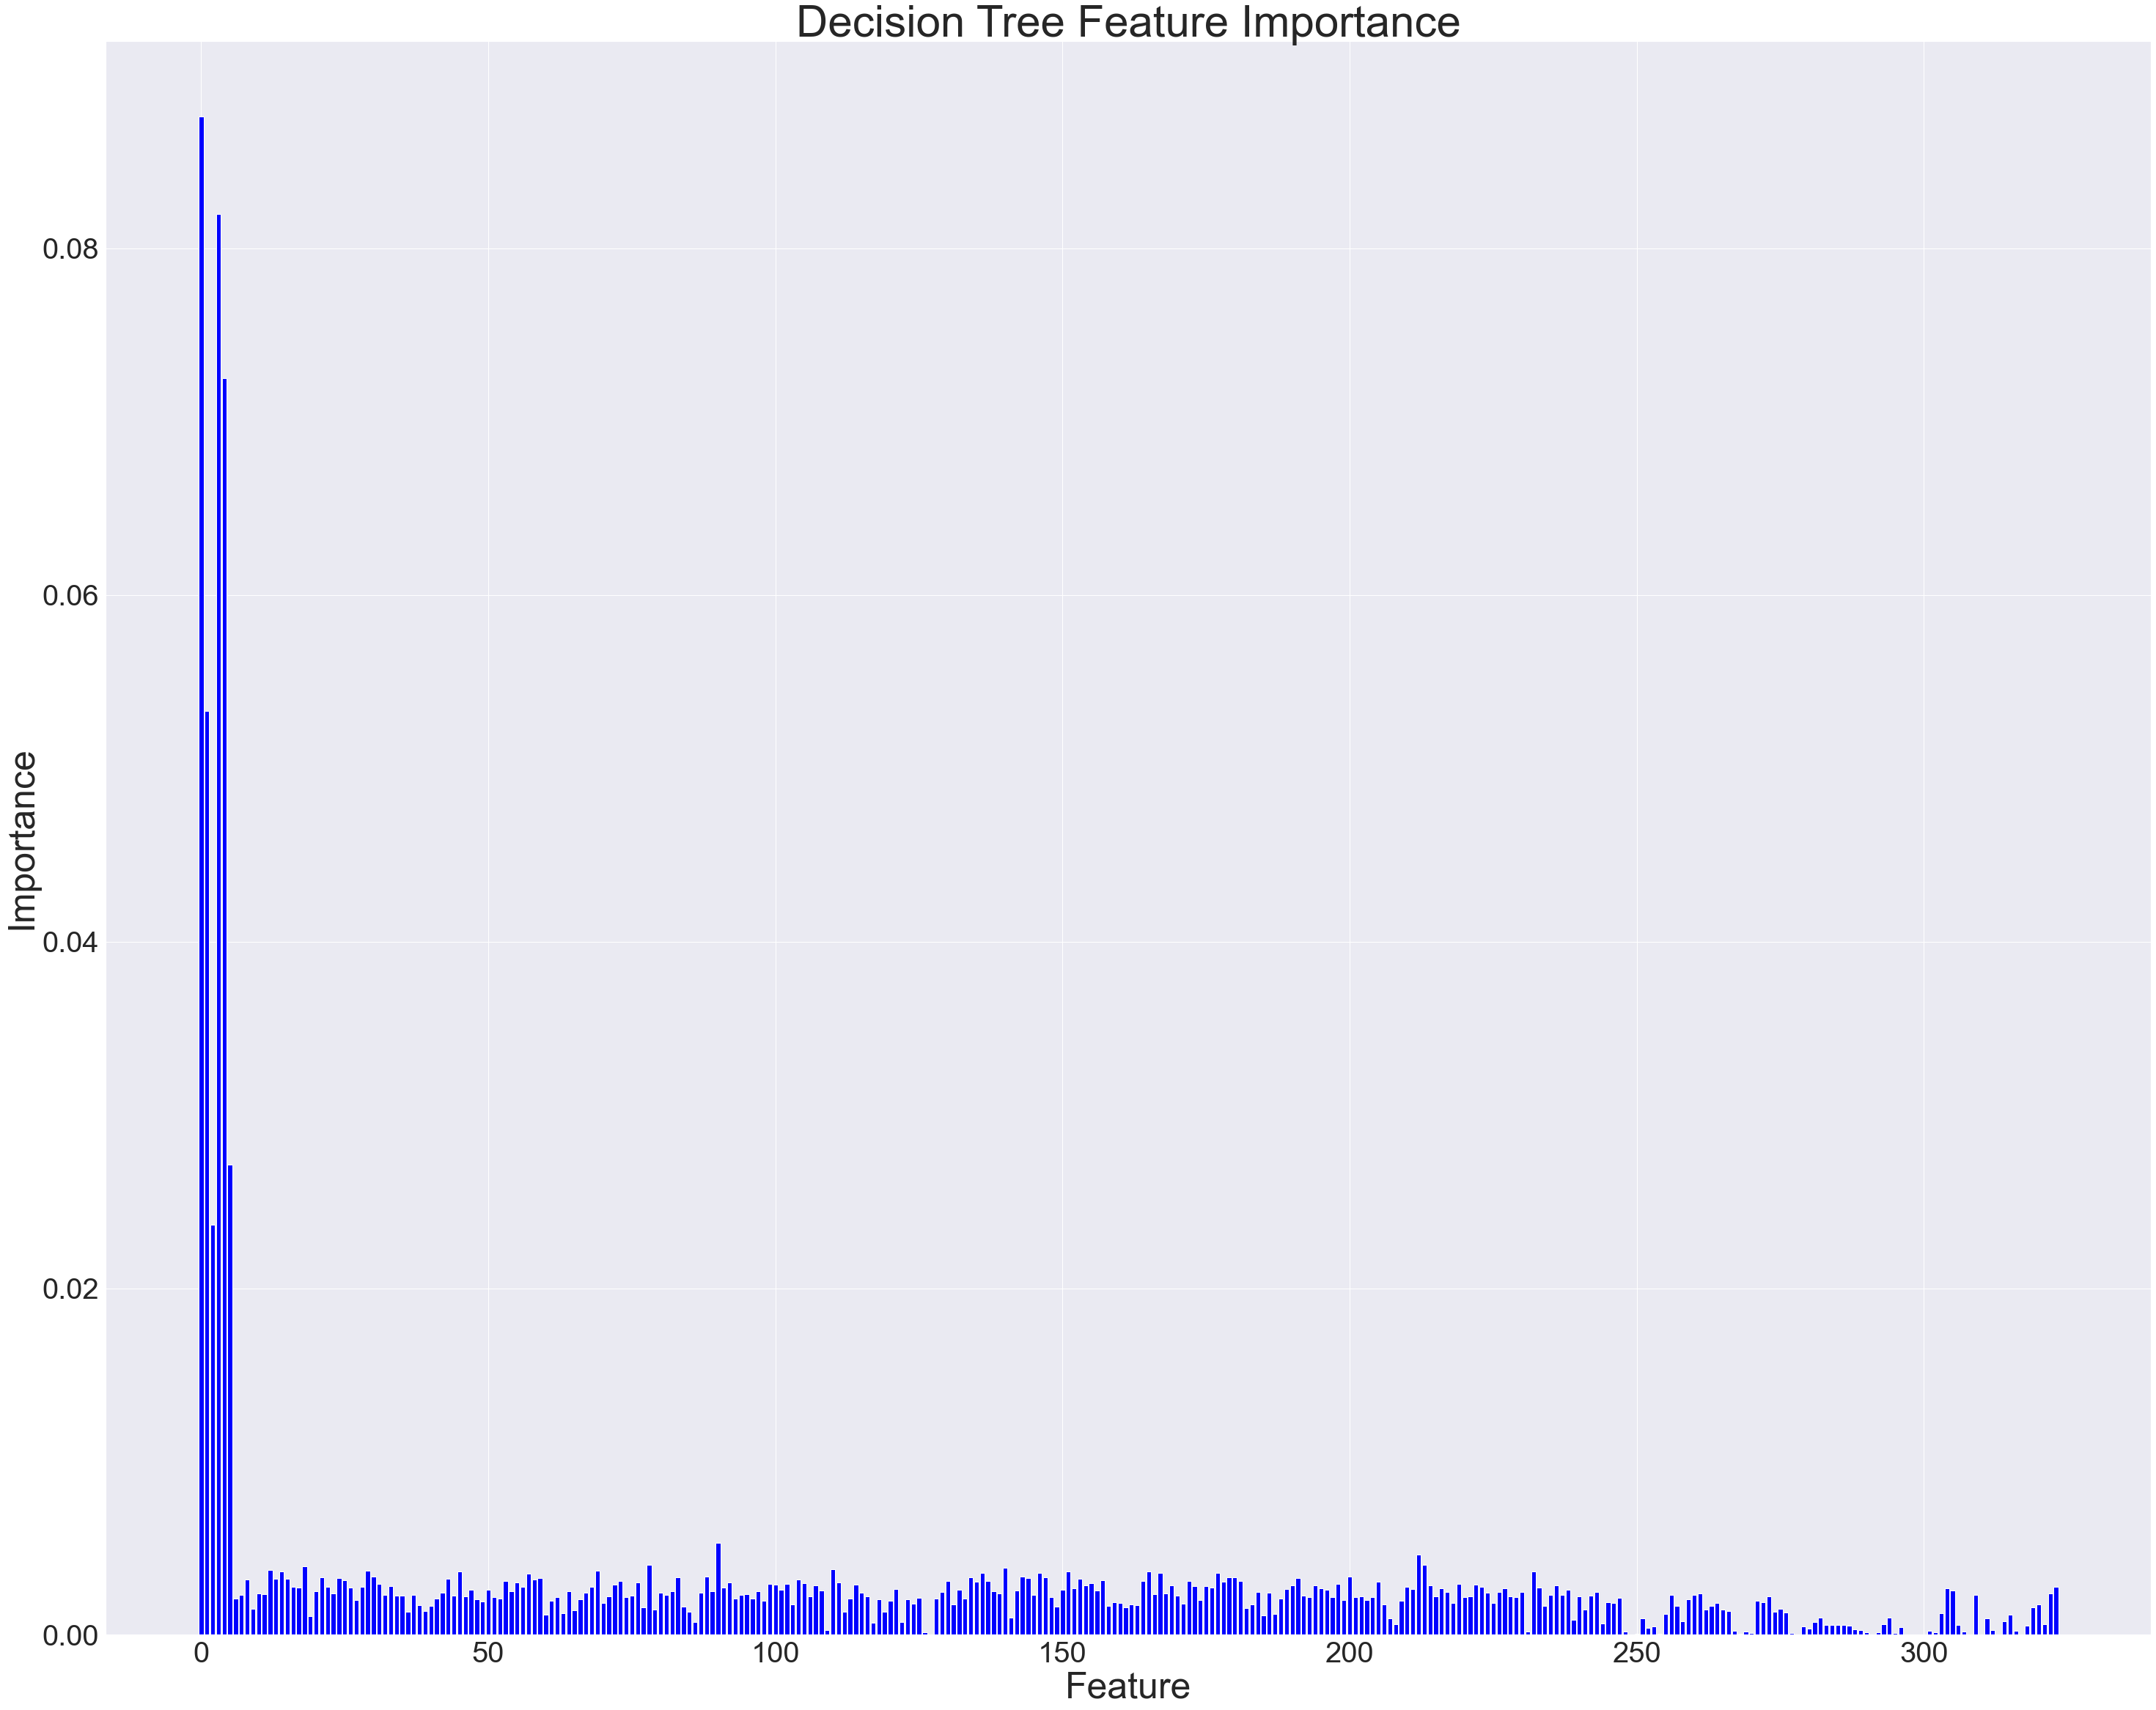

In [203]:
# create and fit the model+
dtc = tree.DecisionTreeClassifier()
dtc.fit(X, y)

# Separate and store the feature weights as specified by the model
importance = dict()
for i,v in enumerate(dtc.feature_importances_):
    importance[i] = v
    
imp_df_large = imp_df_large.append(importance, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(dtc.feature_importances_))], dtc.feature_importances_, color='blue')
plt.title("Decision Tree Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Random Forest

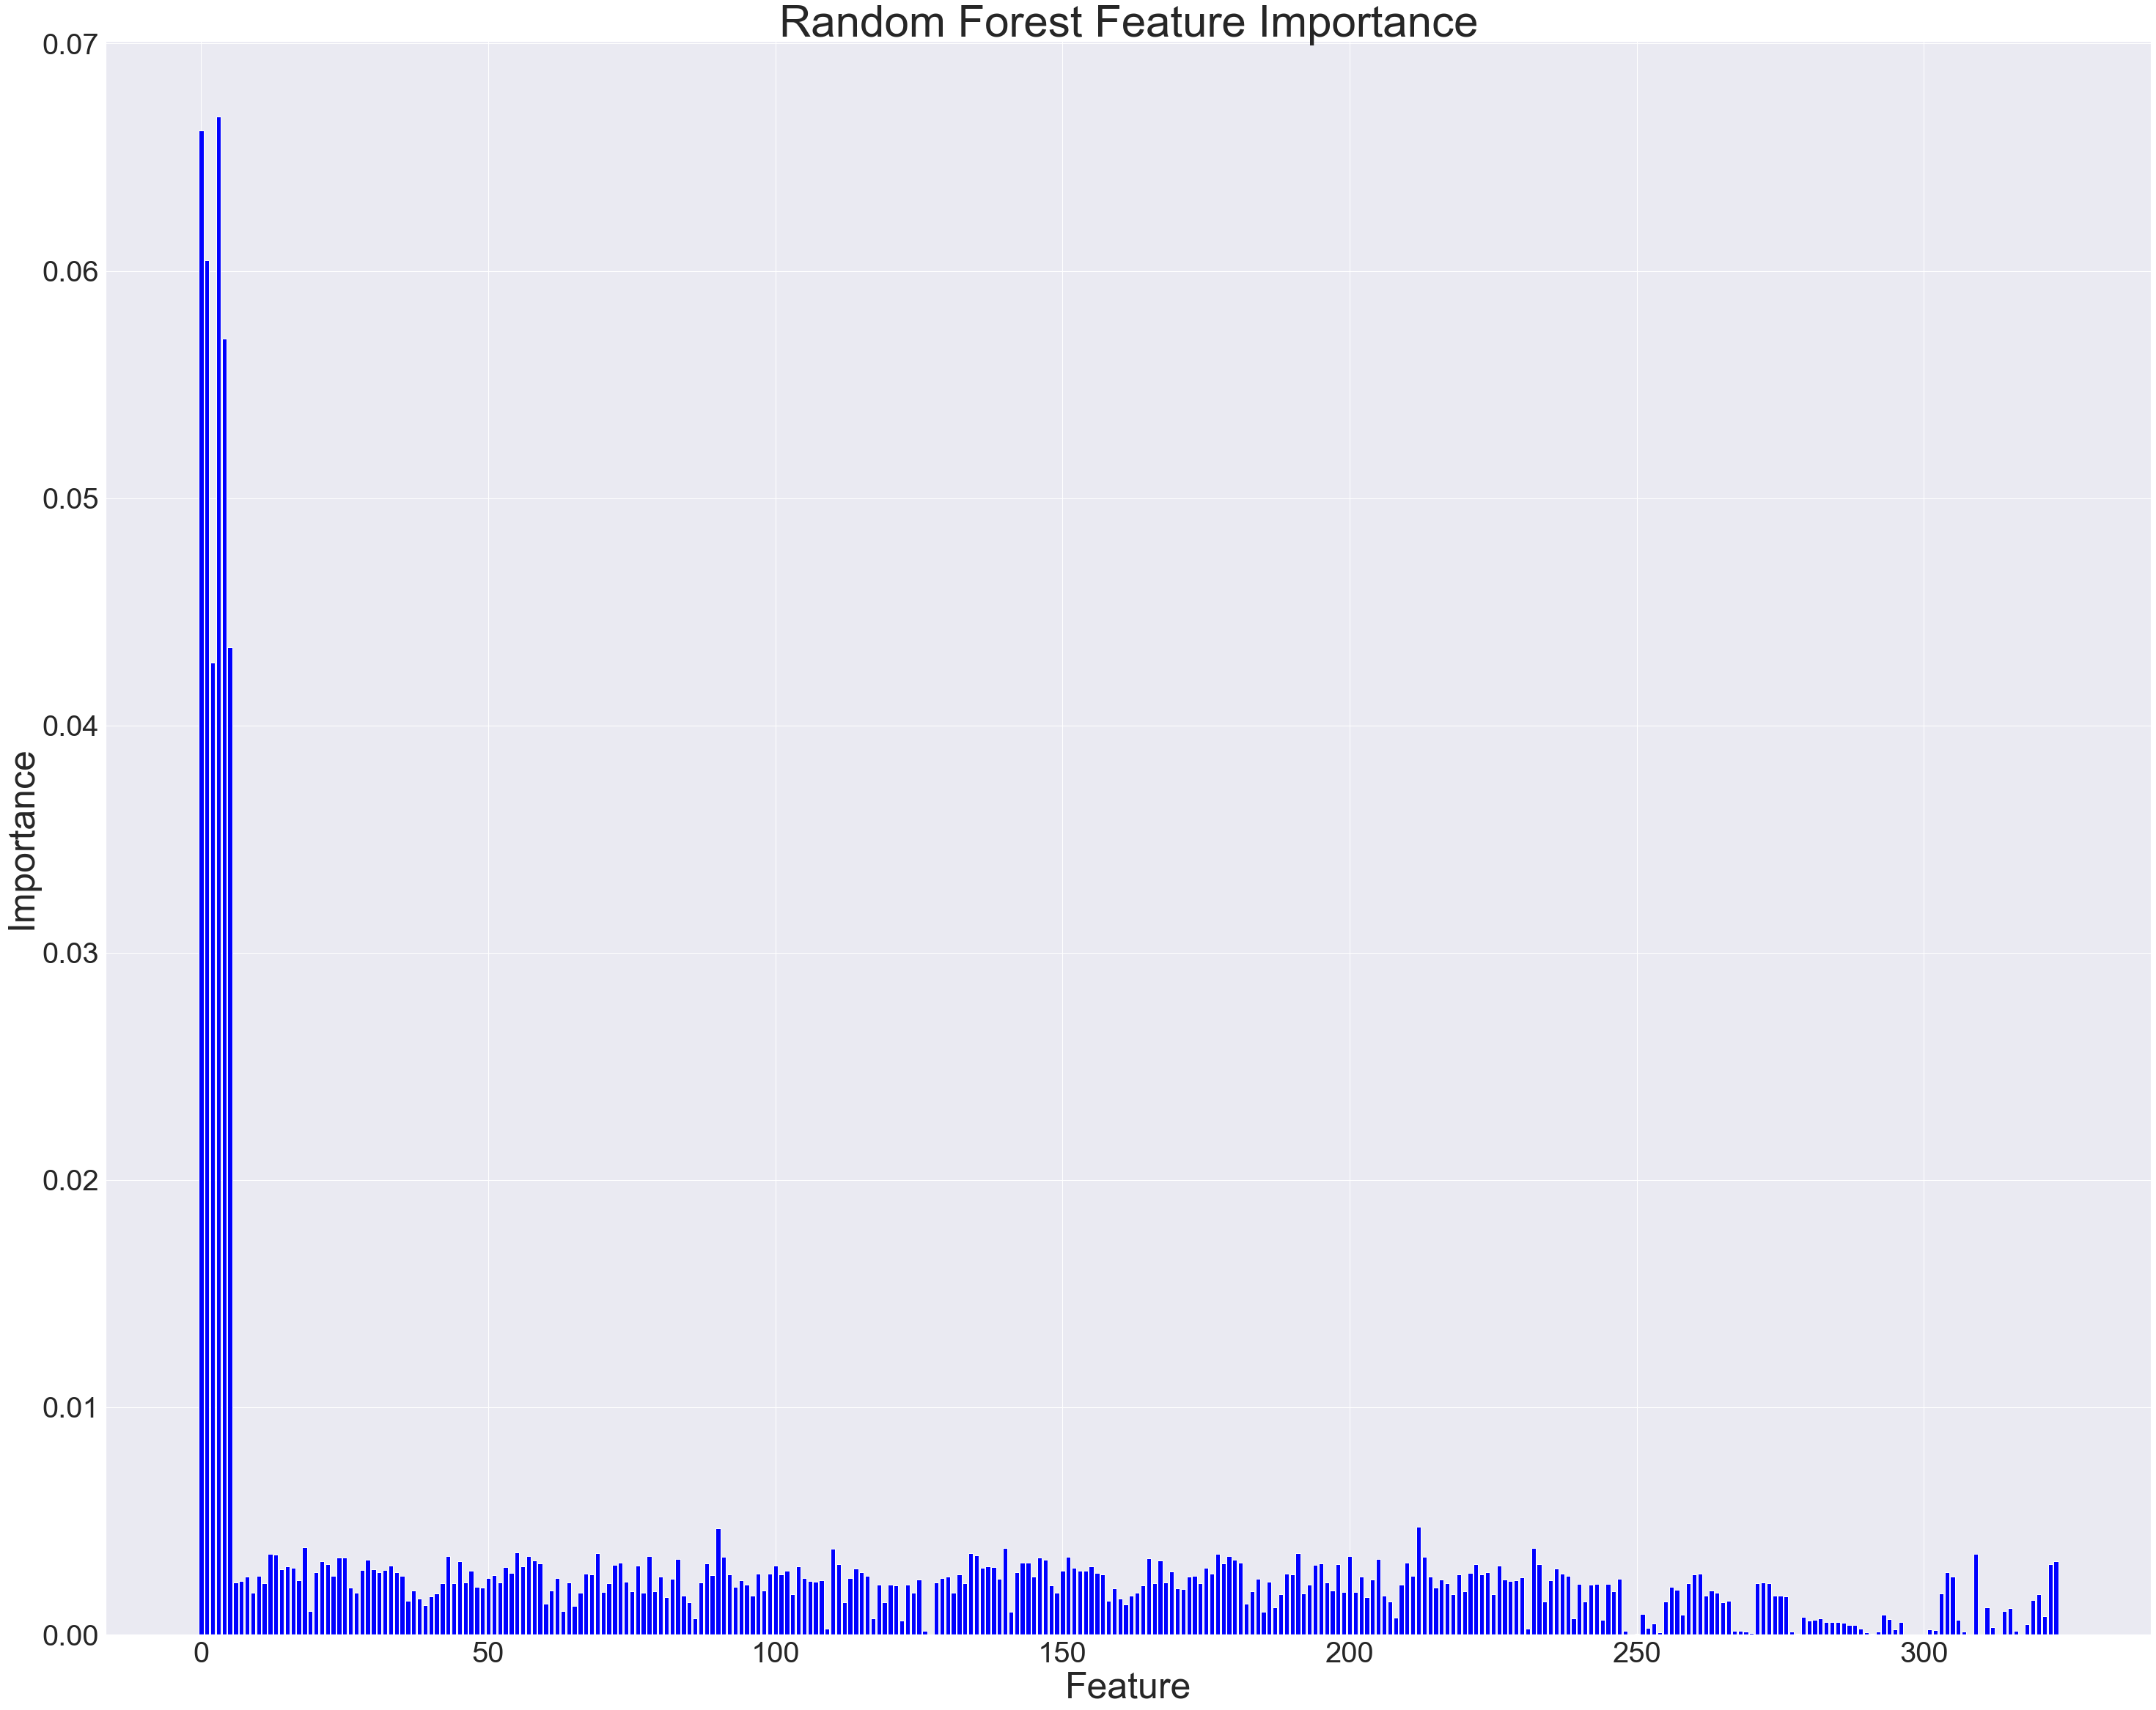

In [ ]:
rfm = ensemble.RandomForestClassifier()
rfm.fit(X, y)

importance = dict()
for i,v in enumerate(rfm.feature_importances_):
    importance[i] = v
    
imp_df_large = imp_df_large.append(importance, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(rfm.feature_importances_))], rfm.feature_importances_, color='blue')
plt.title("Random Forest Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Naive Bayes with Permutation importance

https://inblog.in/Feature-Importance-in-Naive-Bayes-Classifiers-5qob5d5sFW

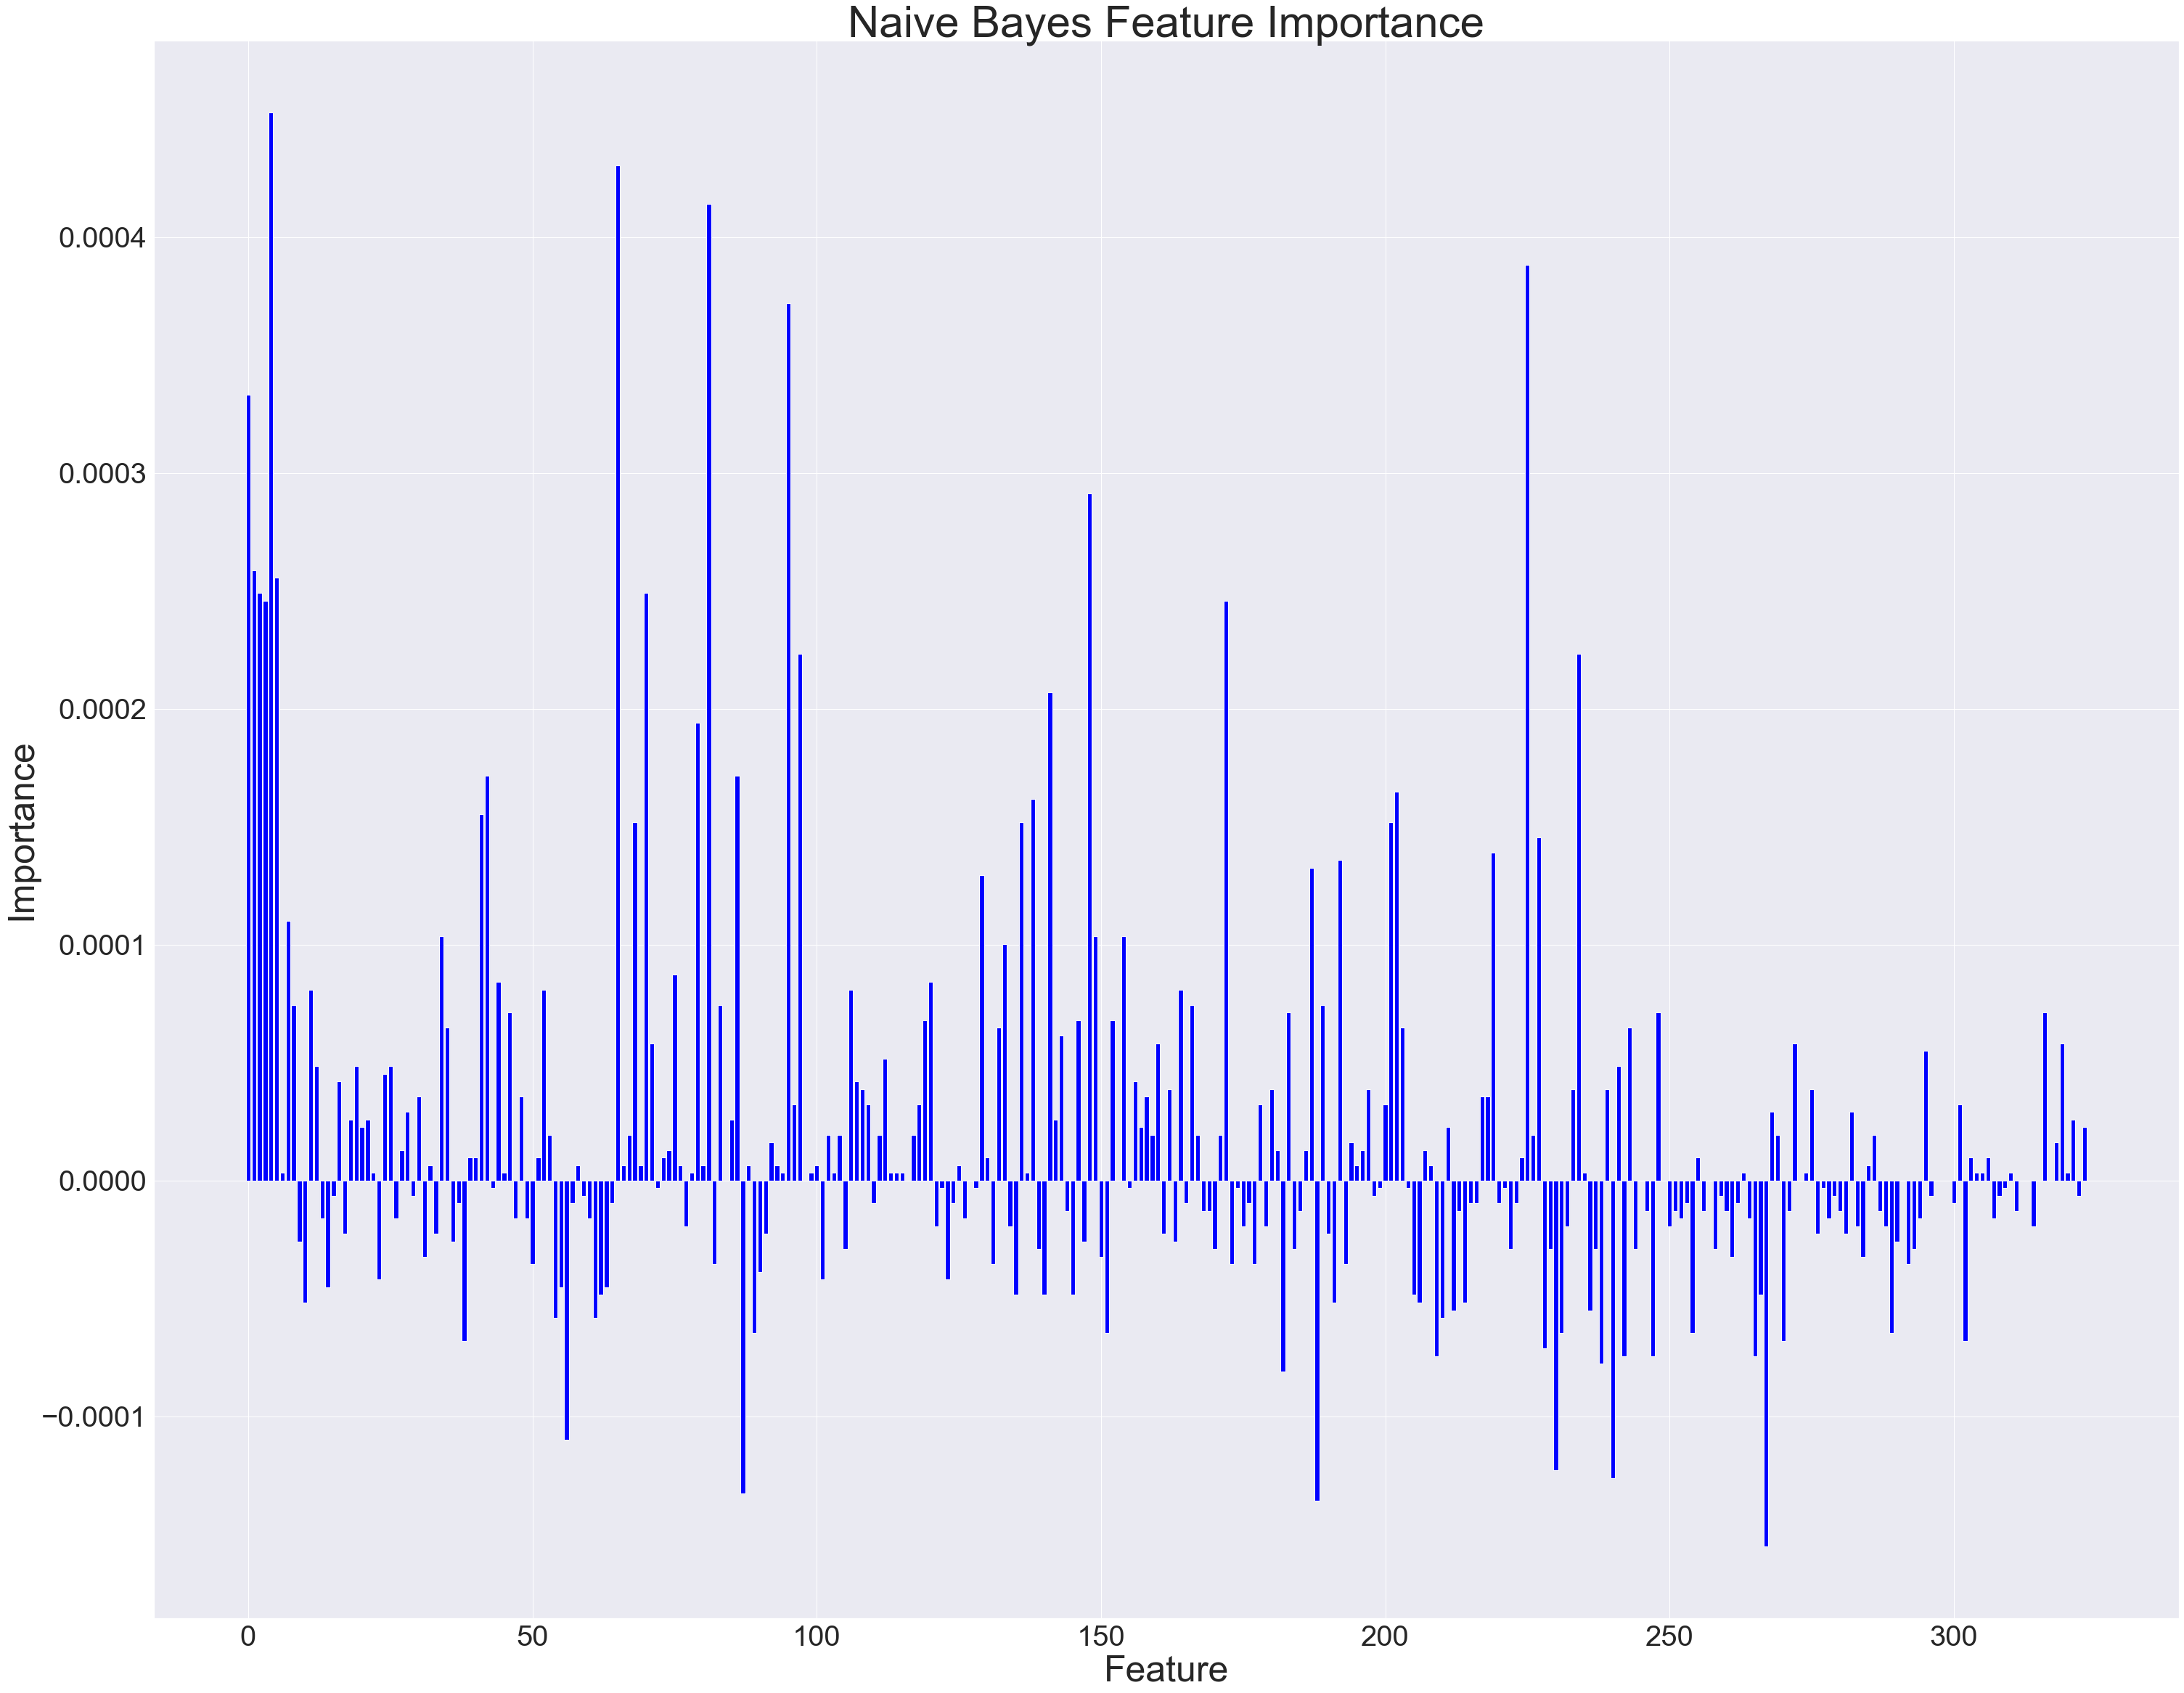

In [206]:
#Create model, train, test splits
gnb = naive_bayes.GaussianNB()
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.3, random_state=173)
gnb.fit(X_train, y_train)

# Calculate importances by testing with the trained model
imps = inspection.permutation_importance(gnb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std

#store the feature importances
gnb_imp = dict()
for i,j in enumerate(importances):
    gnb_imp[i] = j
imp_df_large = imp_df_large.append(gnb_imp, ignore_index=True)

# plot feature importance
plt.figure(figsize=(50, 40))
plt.bar([x for x in range(len(imps.importances_mean))], imps.importances_mean, color='blue')
plt.title("Naive Bayes Feature Importance")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.show()

#### Label columns and index

In [209]:
imp_df_large['model'] = ['Logistic Regression', 'Decision Trees', 'Random Forest', 'Naive Bayes']
imp_df_large.set_index('model', inplace=True)
imp_df_large.columns = X.columns
imp_df_large.shape

(4, 324)

In [216]:
imp_df_large.head()

dire_rating  dire_wins  dire_losses  radiant_rating  \
model                                                                      
Logistic Regression    -0.581014   0.225162    -0.255543        0.581019   
Decision Trees          0.087603   0.053298     0.023652        0.082006   
Random Forest           0.066177   0.060470     0.042755        0.066776   
Naive Bayes             0.000333   0.000259     0.000249        0.000246   

                     radiant_wins  radiant_losses  dire_Anti-Mage  dire_Axe  \
model                                                                         
Logistic Regression     -0.225156        0.255548        0.003222 -0.019792   
Decision Trees           0.072508        0.027112        0.002080  0.002283   
Random Forest            0.057014        0.043431        0.002285  0.002354   
Naive Bayes              0.000453        0.000256        0.000003  0.000110   

                     dire_Bane  dire_Bloodseeker  ...    cluster_64  \
model                                             ...                 
Logistic Regression   0.015511         -0.001503  ... -7.949504e-08   
Decision Trees        0.003176          0.001497  ...  7.537482e-04   
Random Forest         0.002553          0.001839  ...  1.057367e-03   
Naive Bayes           0.000074         -0.000026  ... -1.941371e-05   

                       cluster_65    cluster_66    cluster_67   game_mode_0  \
model                                                                         
Logistic Regression -1.028194e-07  4.210496e-07 -3.044430e-09  1.682479e-07   
Decision Trees       1.157242e-03  2.215795e-04  0.000000e+00  4.992844e-04   
Random Forest        1.164360e-03  1.831436e-04  3.404924e-08  4.673499e-04   
Naive Bayes          0.000000e+00  7.118359e-05  0.000000e+00  1.617809e-05   

                      game_mode_1   game_mode_2        tier_0    tier_1  \
model                                                                     
Logistic Regression -4.188546e-08 -4.775300e-08  3.302411e-08  0.000001   
Decision Trees       1.573762e-03  1.759793e-03  5.838415e-04  0.002397   
Random Forest        1.511886e-03  1.778002e-03  8.275138e-04  0.003103   
Naive Bayes          5.824112e-05  3.235618e-06  2.588494e-05 -0.000006   

                       tier_2  
model                          
Logistic Regression -0.000001  
Decision Trees       0.002767  
Random Forest        0.003246  
Naive Bayes          0.000023  

[4 rows x 324 columns]

## Recap on feature importance for both datasets and all models 

In [259]:
def top_ranked(values, num_top):
    vals = {k: v for k, v in sorted(values.items(), key=lambda item: item[1], reverse=True)}
    items = list(vals.items())
    top_vals = {items[i][0]: items[i][1] for i in range(num_top)}
    return top_vals

In [277]:
NUM_TOP = 5
small_cols = imp_df_small.columns
large_cols = imp_df_large.columns

In [286]:
model = "Logistic Regression"
# Logistic regression for Class 0
print("{: <20}Logistic Regression Feature Importance: Loss\n".format(""))
small_vals = {k:v for k,v in zip(small_cols, imp_df_small.loc[model, :]) if v > 0}
large_vals = {k:v for k,v in zip(large_cols, imp_df_large.loc[model, :]) if v > 0}
small_vals = list(top_ranked(small_vals, NUM_TOP).items())
large_vals = list(top_ranked(large_vals, NUM_TOP).items())

print("{: <13}Small Dataset{: <28}Large Dataset{: <10}".format("","",""))
for i in range(NUM_TOP):
    print("{:2.0f}. {: <25} - {:2.4f}   {:2.0f}. {: <20} - {:2.4f}".format(i+1, small_vals[i][0], small_vals[i][1], i+1, large_vals[i][0], large_vals[i][1]))
    
print("\n")
# Logistic regression for Class 1
print("{: <20}Logistic Regression Feature Importance: Win\n".format(""))
small_vals = {k:abs(v) for k,v in zip(small_cols, imp_df_small.loc[model, :]) if v < 0}
large_vals = {k:abs(v) for k,v in zip(large_cols, imp_df_large.loc[model, :]) if v < 0}
small_vals = list(top_ranked(small_vals, NUM_TOP).items())
large_vals = list(top_ranked(large_vals, NUM_TOP).items())

print("{: <15}Small Dataset{: <40}Large Dataset{: <10}".format("","",""))
for i in range(NUM_TOP):
    print("{:2.0f}. {: <35} - {:2.4f}   {:2.0f}. {: <20} - {:2.4f}".format(i+1, small_vals[i][0], small_vals[i][1], i+1, large_vals[i][0], large_vals[i][1]))

                    Logistic Regression Feature Importance: Loss

             Small Dataset                            Large Dataset          
 1. avg_wl_hero_ratio_radiant - 1.1409    1. radiant_rating       - 0.5810
 2. max_avg_deaths_radiant    - 0.9333    2. radiant_losses       - 0.2555
 3. Zeus                      - 0.7074    3. dire_wins            - 0.2252
 4. min_mmr_estimate_dire     - 0.6258    4. dire_Chen            - 0.0488
 5. max_mmr_estimate_dire     - 0.6038    5. dire_Beastmaster     - 0.0402


                    Logistic Regression Feature Importance: Win

               Small Dataset                                        Large Dataset          
 1. avg_wl_hero_ratio_dire              - 1.4790    1. dire_rating          - 0.5810
 2. avg_solo_competitive_rank_radiant   - 0.7591    2. dire_losses          - 0.2555
 3. std_avg_deaths_radiant              - 0.7398    3. radiant_wins         - 0.2252
 4. cluster_mode_league20               - 0.6701    4. radiant_Chen

In [287]:
# Decision Trees
model='Decision Trees'
print("{: <20}Decision Trees Feature Importance: Loss\n".format(""))
small_vals = {k:v for k,v in zip(small_cols, imp_df_small.loc[model, :])}
large_vals = {k:v for k,v in zip(large_cols, imp_df_large.loc[model, :])}
small_vals = list(top_ranked(small_vals, NUM_TOP).items())
large_vals = list(top_ranked(large_vals, NUM_TOP).items())

print("{: <13}Small Dataset{: <28}Large Dataset{: <10}".format("","",""))
for i in range(NUM_TOP):
    print("{:2.0f}. {: <25} - {:2.4f}   {:2.0f}. {: <20} - {:2.4f}".format(i+1, small_vals[i][0], small_vals[i][1], i+1, large_vals[i][0], large_vals[i][1]))

                    Decision Trees Feature Importance: Loss

             Small Dataset                            Large Dataset          
 1. max_wl_hero_ratio_dire    - 0.0495    1. dire_rating          - 0.0876
 2. avg_wl_hero_ratio_radiant - 0.0327    2. radiant_rating       - 0.0820
 3. Tidehunter                - 0.0285    3. radiant_wins         - 0.0725
 4. Earthshaker               - 0.0277    4. dire_wins            - 0.0533
 5. std_competitive_rank_dire - 0.0253    5. radiant_losses       - 0.0271


In [288]:
# Forsest Trees
model = "Random Forest"
print("{: <20}Forest Trees Feature Importance: Loss\n".format(""))
small_vals = {k:v for k,v in zip(small_cols, imp_df_small.loc[model, :]) if v > 0}
large_vals = {k:v for k,v in zip(large_cols, imp_df_large.loc[model, :]) if v > 0}
small_vals = list(top_ranked(small_vals, NUM_TOP).items())
large_vals = list(top_ranked(large_vals, NUM_TOP).items())

print("{: <13}Small Dataset{: <28}Large Dataset{: <10}".format("","",""))
for i in range(NUM_TOP):
    print("{:2.0f}. {: <25} - {:2.4f}   {:2.0f}. {: <20} - {:2.4f}".format(i+1, small_vals[i][0], small_vals[i][1], i+1, large_vals[i][0], large_vals[i][1]))
    

                    Forest Trees Feature Importance: Loss

             Small Dataset                            Large Dataset          
 1. max_wl_hero_ratio_dire    - 0.0278    1. radiant_rating       - 0.0668
 2. avg_wl_hero_ratio_dire    - 0.0261    2. dire_rating          - 0.0662
 3. avg_wl_hero_ratio_radiant - 0.0251    3. dire_wins            - 0.0605
 4. min_wl_hero_ratio_radiant - 0.0203    4. radiant_wins         - 0.0570
 5. min_wl_hero_ratio_dire    - 0.0197    5. radiant_losses       - 0.0434


In [289]:
# Naive Bayes
model = 'Naive Bayes'
print("{: <20}Naive Bayes Feature Importance: Loss\n".format(""))
small_vals = {k:v for k,v in zip(small_cols, imp_df_small.loc[model, :]) if v > 0}
large_vals = {k:v for k,v in zip(large_cols, imp_df_large.loc[model, :]) if v > 0}
small_vals = list(top_ranked(small_vals, NUM_TOP).items())
large_vals = list(top_ranked(large_vals, NUM_TOP).items())

print("{: <13}Small Dataset{: <28}Large Dataset{: <10}".format("","",""))
for i in range(NUM_TOP):
    print("{:2.0f}. {: <25} - {:2.4f}   {:2.0f}. {: <20} - {:2.4f}".format(i+1, small_vals[i][0], small_vals[i][1], i+1, large_vals[i][0], large_vals[i][1]))
    
print("\n")
# Logistic regression for Class 1
print("{: <20}Naive Bayes Feature Importance: Win\n".format(""))
small_vals = {k:abs(v) for k,v in zip(small_cols, imp_df_small.loc[model, :]) if v < 0}
large_vals = {k:abs(v) for k,v in zip(large_cols, imp_df_large.loc[model, :]) if v < 0}
small_vals = list(top_ranked(small_vals, NUM_TOP).items())
large_vals = list(top_ranked(large_vals, NUM_TOP).items())

print("{: <15}Small Dataset{: <40}Large Dataset{: <10}".format("","",""))
for i in range(NUM_TOP):
    print("{:2.0f}. {: <35} - {:2.4f}   {:2.0f}. {: <20} - {:2.4f}".format(i+1, small_vals[i][0], small_vals[i][1], i+1, large_vals[i][0], large_vals[i][1]))

                    Naive Bayes Feature Importance: Loss

             Small Dataset                            Large Dataset          
 1. Slark                     - 0.0118    1. radiant_wins         - 0.0005
 2. cluster_mode_league13     - 0.0094    2. dire_Broodmother     - 0.0004
 3. cluster_mode_league22     - 0.0079    3. dire_Lycan           - 0.0004
 4. Brewmaster                - 0.0071    4. radiant_Bristleback  - 0.0004
 5. Phantom Lancer            - 0.0063    5. dire_Io              - 0.0004


                    Naive Bayes Feature Importance: Win

               Small Dataset                                        Large Dataset          
 1. min_wl_ratio_dire                   - 0.0094    1. cluster_17           - 0.0002
 2. Shadow Fiend                        - 0.0087    2. radiant_Bounty Hunter - 0.0001
 3. Lina                                - 0.0087    3. dire_Treant Protector - 0.0001
 4. Warlock                             - 0.0087    4. radiant_Monkey King  - 0.0

#### Plot top features

In [212]:
# Plot a model's feature importance for both the small and large dataset
def plot_features(model, small_values, large_values, small_labels):
    pass

In [228]:
# Logistic Regression
small_vals = [i for i in imp_df_small.loc['Logistic Regression', :] if i > 0]
large_vals = [i for i in imp_df_large.loc['Logistic Regression', :] if i > 0]
plot_features("Logistic Regression: Loss", small_vals, large_vals, imp_small_df.

Index(['Anti-Mage', 'Axe', 'Bane', 'Bloodseeker', 'Crystal Maiden',
       'Drow Ranger', 'Earthshaker', 'Juggernaut', 'Mirana', 'Morphling',
       ...
       'cluster_mode_league18', 'cluster_mode_league19',
       'cluster_mode_league20', 'cluster_mode_league21',
       'cluster_mode_league22', 'cluster_mode_league23',
       'cluster_mode_league24', 'cluster_mode_league25',
       'cluster_mode_league26', 'cluster_mode_league27'],
      dtype='object', length=213)

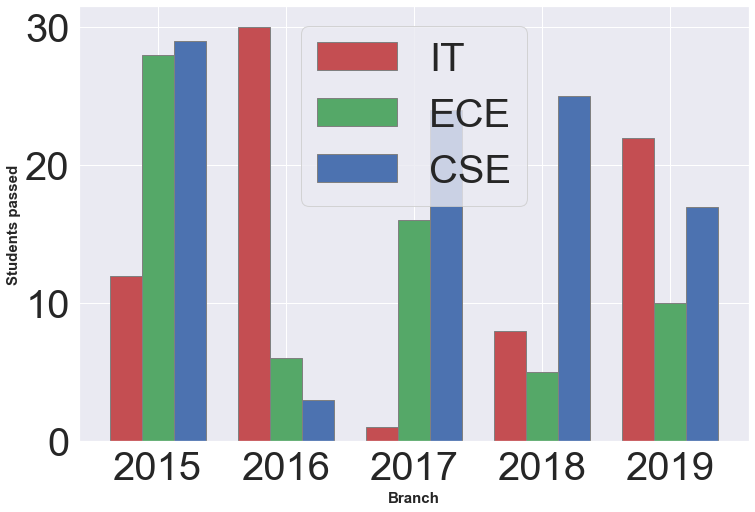

In [208]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

#
 
# Set position of bar on X axis
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, IT, color ='r', width = barWidth,
        edgecolor ='grey', label ='IT')
plt.bar(br2, ECE, color ='g', width = barWidth,
        edgecolor ='grey', label ='ECE')
plt.bar(br3, CSE, color ='b', width = barWidth,
        edgecolor ='grey', label ='CSE')
 
# Adding Xticks
plt.xlabel('Branch', fontweight ='bold', fontsize = 15)
plt.ylabel('Students passed', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
        ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()